# Optimization of the XGBoost algorithm

In [37]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


467 administrations left.


id
diagnosis     
0.0        417
1.0         50

experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected     F2  F2 Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal All  0.871   0.541         0.92              0.26                  0.984                           0.649               0.159  0.649         0.307     0.833                                   0.467                                                0.8                                                       0.837                                             0.37                                              0.102                                 0.972                                     0.2                              0.63                            0.028  40  349  68  10

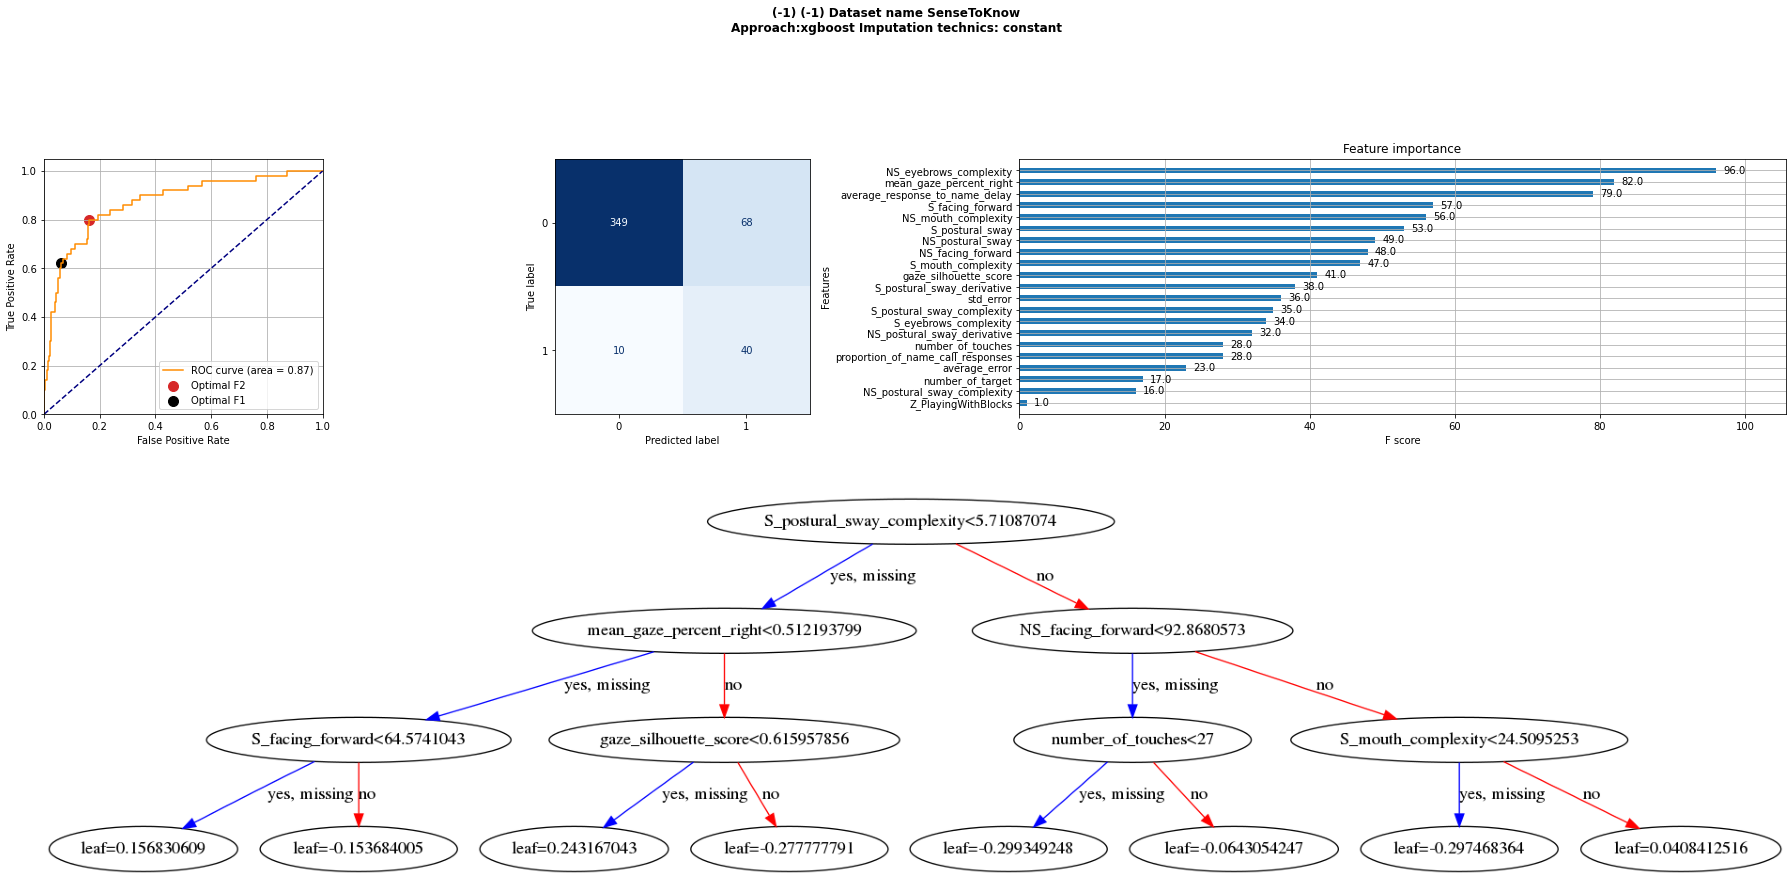

In [2]:
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 3,
                            'learning_rate' : 0.15, 
                            'gamma': 0.1,
                            'n_estimators': 200,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}
    
use_weight = True
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    
    
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='Final', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'Multimodal All',
                  verbosity=1, 
                  save_experiment=False)

exp.fit_predict(num_cv='loocv', sample_weight=weighted_confidence_score)
exp.predictions_df['sample_weight'] = weighted_confidence_score
exp.plot()



experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected     F2  F2 Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  Multimodal All  0.871   0.541         0.92              0.26                  0.984                           0.649               0.159  0.649         0.307     0.833                                   0.467                                                0.8                                                       0.837                                             0.37                                              0.102                                 0.972                                     0.2                              0.63                            0.028  40  349  68  10

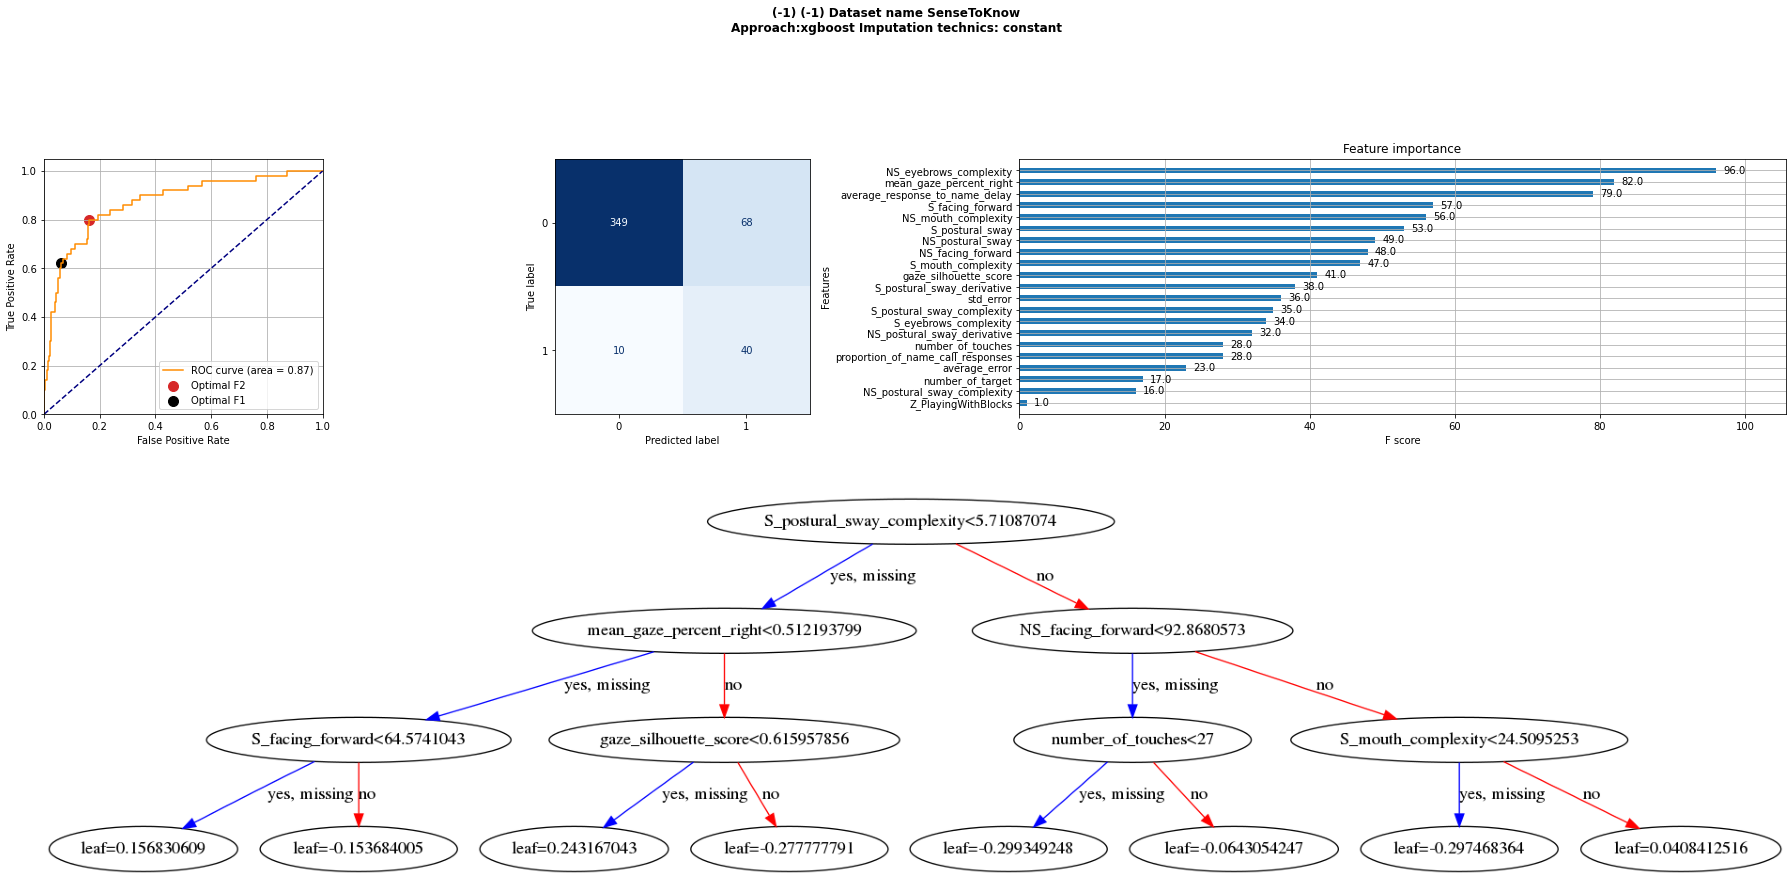

In [3]:
exp.plot()

In [ ]:

import shap

shap.summary_plot(shap_values_normalized, exp.dataset.X_train, feature_names=exp.features_name, plot_size=(25, 15))


X = deepcopy(exp.dataset.X_train)
X[X==-5] = np.nan
for feat in exp.features_name:
    if feat =='NS_postural_sway':
        continue
    
    fig, ax = plt.subplots(1, 1, figsize=(25, 5))
    ax.axhline(0, color='tab:red')
    ax.set_title("Importance plot of {}".format(feat), weight='bold', fontsize=18)
    shap.dependence_plot(feat, shap_values_normalized, X, feature_names=exp.features_name, ax=ax)
    
    

In [561]:
if False:
    df =  pd.read_csv(AUTISM_DATA_PATH)

    new_csv_df = pd.read_csv('/home01/sam/notes_on_stats/doc/src/data/Additional_cva.csv')
    #new_csv_df = new_csv_df.drop_duplicates(subset=['BB_gaze_percent_social'])
    new_csv_df.rename(columns={'participant_id':'id'}, inplace=True)
    new_csv_df['id'] = new_csv_df['id'].apply(lambda x: str(x))
    del new_csv_df['date'] , new_csv_df['study'], new_csv_df['time']

    columns_of_interest = ['FB_head_movement_complexity', 'DIGC_head_movement_complexity', 'DIGRRL_head_movement_complexity', 'ST_head_movement_complexity',
           'MP_head_movement_complexity', 'PB_head_movement_complexity', 'BB_head_movement_complexity', 'RT_head_movement_complexity', 'MML_head_movement_complexity', 'PWB_head_movement_complexity', 'FP_head_movement_complexity', 

                           'FB_facing_forward', 'DIGC_facing_forward', 'DIGRRL_facing_forward', 'ST_facing_forward', 'MP_facing_forward', 'PB_facing_forward', 'BB_facing_forward', 'RT_facing_forward', 'MML_facing_forward', 'PWB_facing_forward', 'FP_facing_forward', 

                           'FB_eyebrows_complexity', 'DIGC_eyebrows_complexity', 'DIGRRL_eyebrows_complexity', 'ST_eyebrows_complexity', 'MP_eyebrows_complexity', 'PB_eyebrows_complexity', 'BB_eyebrows_complexity', 'RT_eyebrows_complexity', 'MML_eyebrows_complexity', 'PWB_eyebrows_complexity', 'FP_eyebrows_complexity', 

                           'FB_mouth_complexity', 'DIGC_mouth_complexity', 'DIGRRL_mouth_complexity', 'ST_mouth_complexity', 'MP_mouth_complexity', 'PB_mouth_complexity', 'BB_mouth_complexity', 'RT_mouth_complexity', 'MML_mouth_complexity', 'PWB_mouth_complexity', 'FP_mouth_complexity']

    len(pd.merge(left=df, right=new_csv_df[['id'] + columns_of_interest], how='left', on='id')['PWB_facing_forward'].dropna())#to_csv(AUTISM_DATA_PATH, index=False)
    pd.merge(left=df, right=new_csv_df[['id'] + columns_of_interest], how='left', on='id').to_csv(AUTISM_DATA_PATH, index=False)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder Test.
Doing experiment 7!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0            None   0.86   0.516        0.907             0.233                  0.974                           0.571               0.315     0.897                                   0.518                                               0.64                                                       0.928                                            0.516                                              0.171                                 0.956                                    0.36                             0.484                            0.044  32  387  30  18

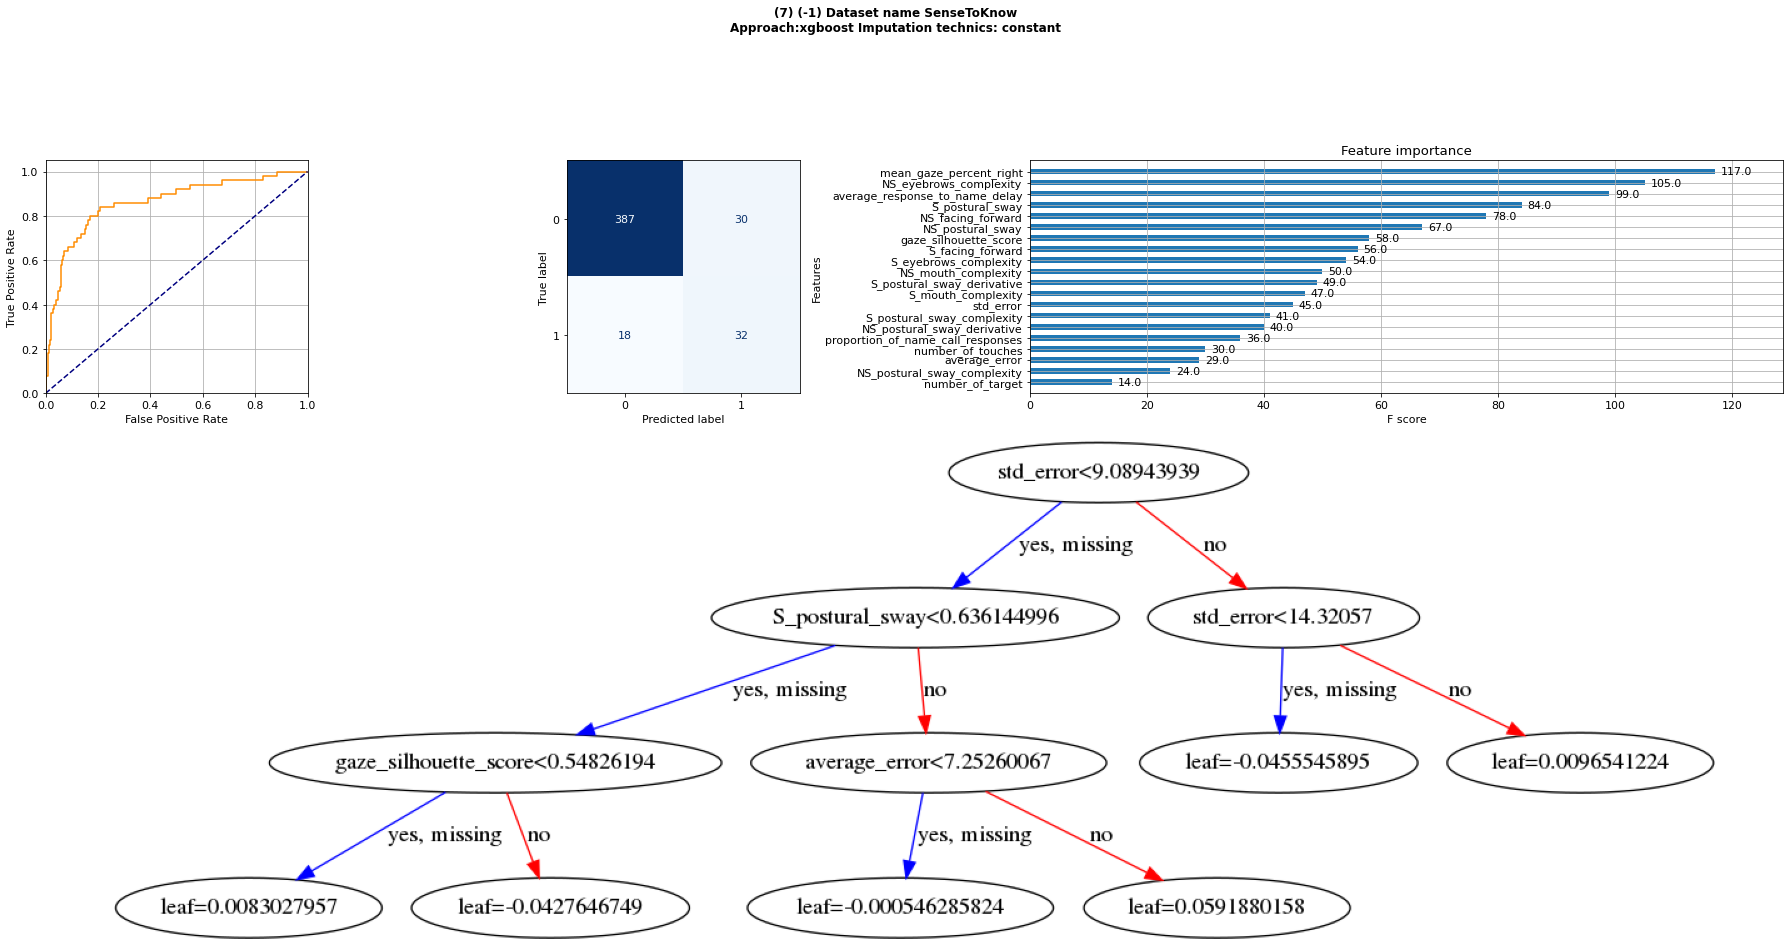

In [72]:
df =  pd.read_csv(AUTISM_DATA_PATH)
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 5,
                            'learning_rate' : 0.1, 
                            'gamma': 0.1,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}

data = Dataset(df=df, 
               missing_data_handling='imputation', 
               imputation_method='constant', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None, 
                    experiment_folder_name = 'Test',
                    experiment_name = None, #'MaxDepth_{}'.format(max_depth),
                    verbosity=1, 
                    debug=True, 
                    save_experiment=True, 
                    model_hyperparameters = xgboost_hyperparameters)

exp.fit_predict(num_cv=5)

exp.plot()

# Overfitting analysis through shap stability assessment

In [ ]:
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 3,
                            'learning_rate' : 0.15, 
                            'gamma': 0.1,
                            'n_estimators': 200,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}
    
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='Final', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'Weight sampling',
                  verbosity=1, 
                  save_experiment=True)

exp.fit_predict(num_cv='loocv')
exp.plot()

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

## Trees exploration

In [6]:
exp.model.get_booster().get_split_value_histogram(feature=exp.features_name[0])#['Count'].sum()

SplitValue  Count
0     0.391312    1.0
1     0.398727    5.0
2     0.450634    3.0
3     0.458049    1.0
4     0.472880    1.0
5     0.487711   33.0
6     0.495126    2.0
7     0.502541    1.0
8     0.509956    1.0
9     0.517372    3.0
10    0.524787    5.0
11    0.532202    2.0
12    0.539618    1.0
13    0.547033    5.0
14    0.554448    1.0
15    0.561864    1.0
16    0.569279    3.0
17    0.576694    1.0
18    0.591525    6.0
19    0.621186    1.0
20    0.628601    5.0

In [7]:
exp.model.get_booster().trees_to_dataframe()['Tree'].max()+1

200

In [8]:
tree_df = exp.model.get_booster().trees_to_dataframe()
len(tree_df[tree_df['Feature']=='Leaf']) / 2**exp.model.max_depth


137.0

In [9]:
exp.model.get_booster().trees_to_dataframe().groupby("Tree").count()['Node'].sum()

1992

In [29]:
exp.model.get_booster().trees_to_dataframe()[:25]

Tree  Node    ID Feature      Split   Yes    No Missing        Gain       Cover  Category
0      0     0   0-0      f8   5.710871   0-1   0-2     0-1  247.961975  208.500000       NaN
1      0     1   0-1      f0   0.512194   0-3   0-4     0-3   69.496635  123.404999       NaN
2      0     2   0-2     f11  92.868057   0-5   0-6     0-5   35.282333   85.095001       NaN
3      0     3   0-3     f10  64.574104   0-7   0-8     0-7   57.055721   53.104999       NaN
4      0     4   0-4      f1   0.615958   0-9  0-10     0-9   15.729187   70.300003       NaN
5      0     5   0-5     f17  27.000000  0-11  0-12    0-11   11.601791   51.334999       NaN
6      0     6   0-6     f14  24.509525  0-13  0-14    0-13   39.218536   33.760002       NaN
7      0     7   0-7    Leaf        NaN   NaN   NaN     NaN    0.156831   27.350000       NaN
8      0     8   0-8    Leaf        NaN   NaN   NaN     NaN   -0.153684   25.755001       NaN
9      0     9   0-9    Leaf        NaN   NaN   NaN     NaN    0.243167   69.050003       NaN
10     0    10  0-10    Leaf        NaN   NaN   NaN     NaN   -0.277778    1.250000       NaN
11     0    11  0-11    Leaf        NaN   NaN   NaN     NaN   -0.299349   46.000000       NaN
12     0    12  0-12    Leaf        NaN   NaN   NaN     NaN   -0.064305    5.335000       NaN
13     0    13  0-13    Leaf        NaN   NaN   NaN     NaN   -0.297468   11.750000       NaN
14     0    14  0-14    Leaf        NaN   NaN   NaN     NaN    0.040841   22.010000       NaN
15     1     0   1-0     f10  91.653992   1-1   1-2     1-1  175.553055  205.860321       NaN
16     1     1   1-1      f0   0.487510   1-3   1-4     1-3   45.576096  124.960098       NaN
17     1     2   1-2     f14  27.738365   1-5   1-6     1-5   61.322151   80.900223       NaN
18     1     3   1-3      f1   0.498459   1-7   1-8     1-7   47.402317   46.785431       NaN
19     1     4   1-4      f1   0.638758   1-9  1-10     1-9   15.733864   78.174667       NaN
20     1     5   1-5      f4   0.559881  1-11  1-12    1-11   17.720886   65.351845       NaN
21     1     6   1-6      f2   0.833333  1-13  1-14    1-13   19.395752   15.548378       NaN
22     1     7   1-7    Leaf        NaN   NaN   NaN     NaN    0.110195   29.407640       NaN
23     1     8   1-8    Leaf        NaN   NaN   NaN     NaN   -0.201523   17.377792       NaN
24     1     9   1-9    Leaf        NaN   NaN   NaN     NaN    0.191540   76.451561       NaN

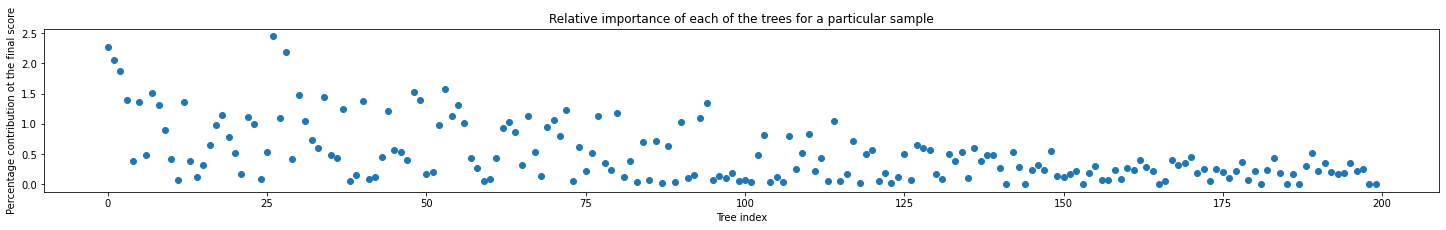

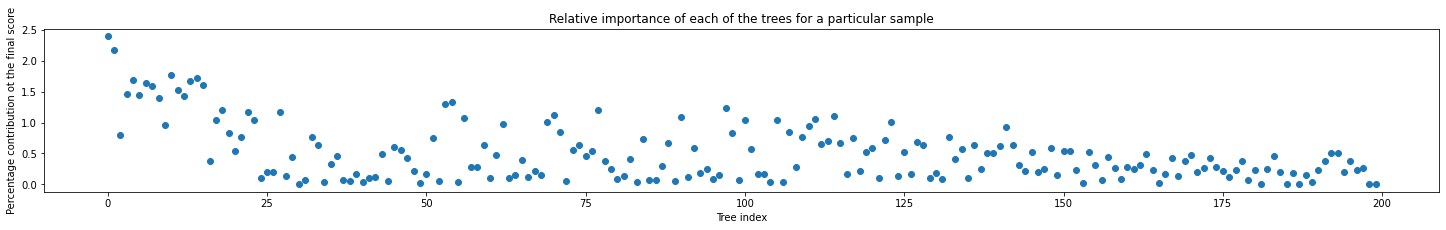

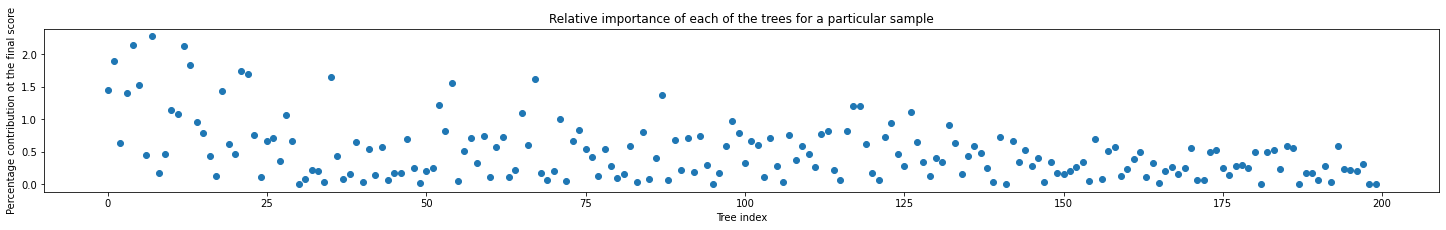

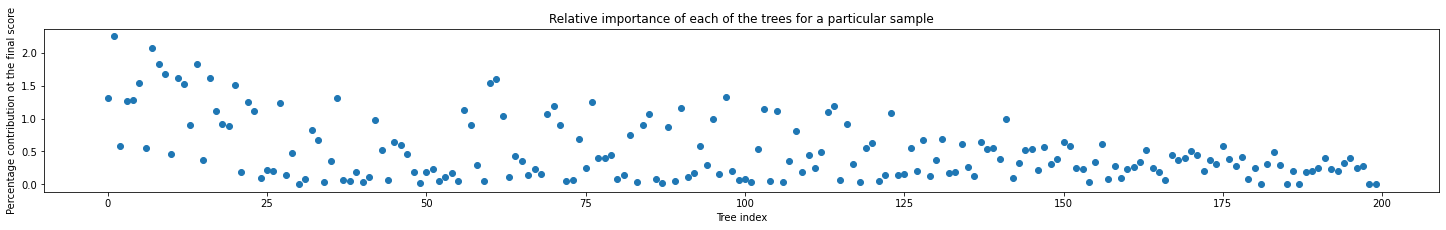

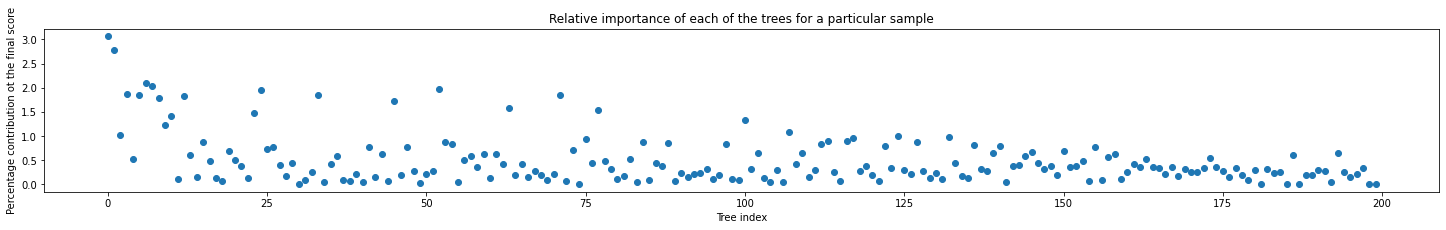

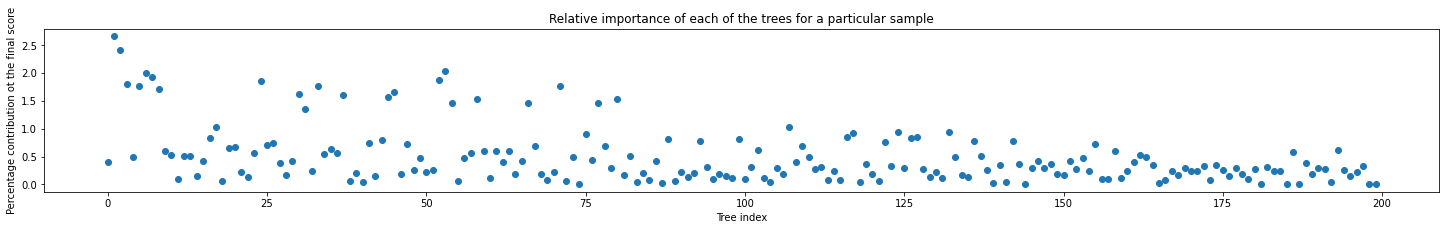

In [11]:
import xgboost as xgb
def select(df, feat, value):
    return df[df[feat]==value]


exp.model.fit(exp.dataset.X_train, exp.dataset.y_train)

df_xgboost_trees = exp.model.get_booster().trees_to_dataframe()
for i in range(50, 56):
    v = []
    for tree_index, node in enumerate(exp.model.get_booster().predict(xgb.DMatrix(exp.dataset.X_train), pred_leaf=True)[i]):
        v.append(select(select(df_xgboost_trees, 'Tree', tree_index), 'Node', node)['Gain'].item())
    fi(25, 3)
    plt.scatter(np.arange(len(v)), np.abs(v)/np.sum(np.abs(v))*100)
    plt.title("Relative importance of each of the trees for a particular sample"); plt.xlabel("Tree index"); plt.ylabel("Percentage contribution ot the final score")
    plt.show()
    #print(1/(1+np.exp(v)) + exp.model.get_booster().predict(xgb.DMatrix(exp.dataset.X_train), pred_leaf=False)[i])

# Age startification

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder Test.
Doing experiment 6!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0            None  0.817   0.365        0.826             0.118                  0.828                           0.462               0.213     0.801                                   0.422                                                0.8                                                       0.801                                            0.325                                              0.085                                 0.971                                     0.2                             0.675                            0.029  40  334  83  10

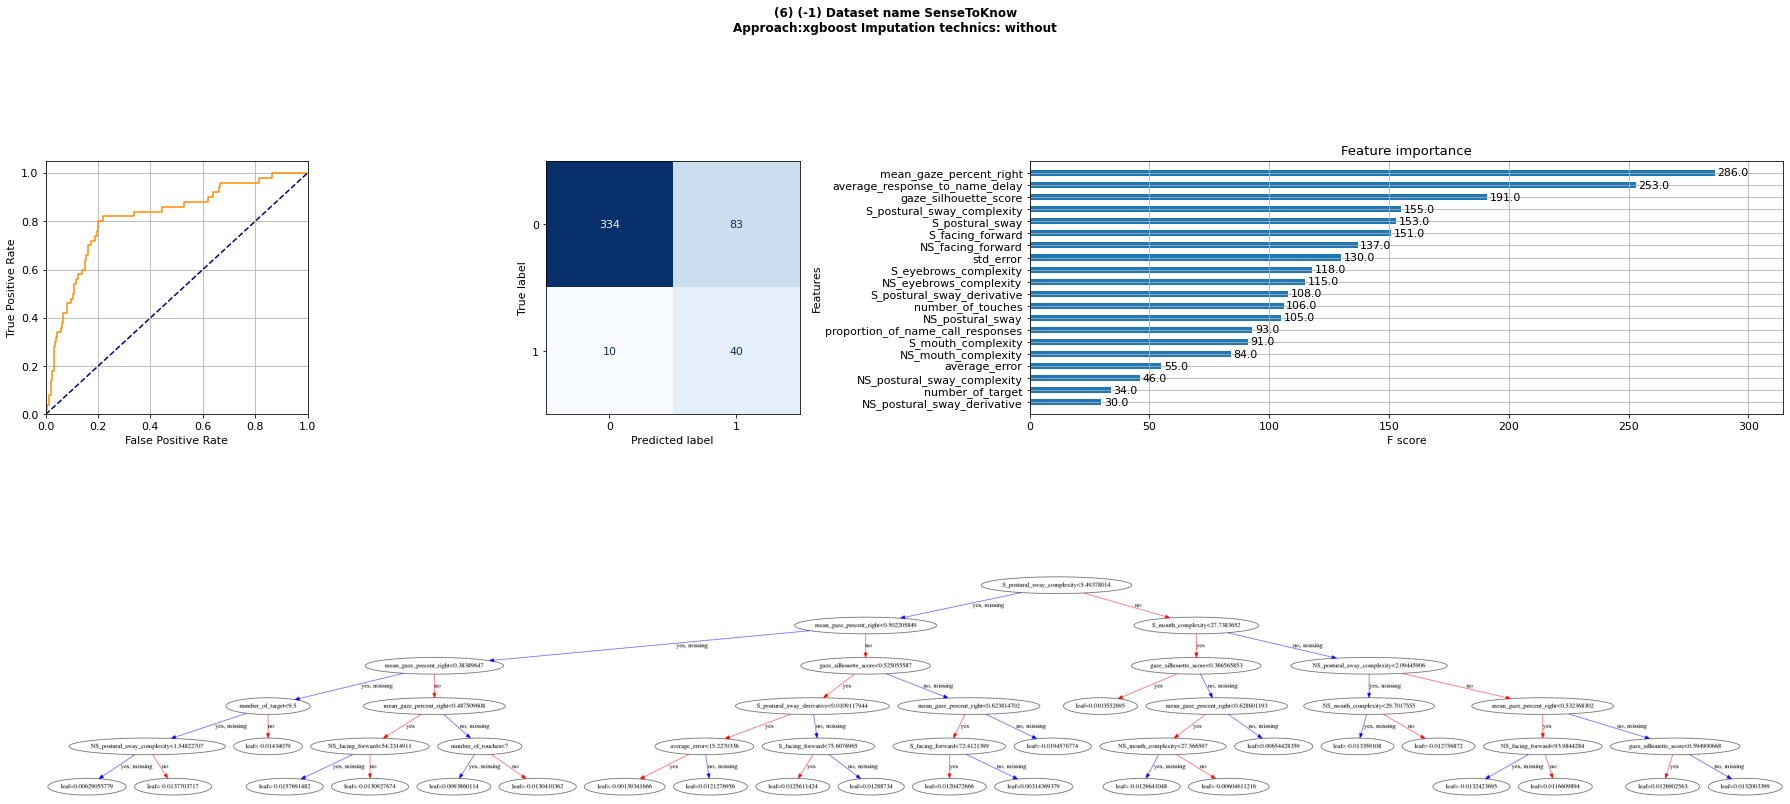

In [8]:
df =  pd.read_csv(AUTISM_DATA_PATH)
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 5,
                            'learning_rate' : 0.01, 
                            'gamma': 0,
                            'min_child_weight': 1,
                            'reg_lambda': 0}

data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=None, 
                    experiment_folder_name = 'Test',
                    experiment_name = None, #'MaxDepth_{}'.format(max_depth),
                    verbosity=1, 
                    debug=True, 
                    save_experiment=True, 
                    model_hyperparameters = xgboost_hyperparameters)

exp.fit_predict(num_cv=5)

exp.plot()

0.5    18.852459
Name: age, dtype: float64

In [27]:
def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=10):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing vi`sualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax



df =  pd.read_csv(AUTISM_DATA_PATH)
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 5,
                            'learning_rate' : 0.01, 
                            'gamma': 0,
                            'min_child_weight': 1,
                            'reg_lambda': 0}

data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False, 
               verbosity=4,
               scenario=None,#'multimodal_2023',#'papers',
               proportion_train=1)

Post-processing inital df (removing columns with no cva features, encoding srings, compute administrations order, compute condensed S/NS variables)... 
Predicting diagnosis based on 20 features
Splitting dataset into test and train set.


In [29]:
data.filter(administration={'studies':  ['ARC', 'P1', 'P2', 'P3'],
                                        'order': 'first',
                                        'completed': True}, 
                           demographics={'age':[17, 37]},
                            clinical={'diagnosis': [0, 1]},
                            verbose=True)

#
# 3) Initialize the raw X and y data.
#         
data._X, data._y = data._init_data()


#
# 4) Split the dataset into train and test set.
#     
data.split_test_train()

#
# 5) Impute or encode missing data. 
#     
data.impute_data()

        

Removing 2019/2817 keeping only subject in studies: ['ARC', 'P1', 'P2', 'P3'].
Removing 9/798 incomplete administrations.
Removing 128/789 keeping first admin.
Removing 152/661 keeping only subject with diagnosis: [0, 1].
Removing 132/509 keeping only subject with age between 17 and 37 mo.
377 administrations left.


id
diagnosis     
0.0        328
1.0         49

Predicting diagnosis based on 20 features
Splitting dataset into test and train set.


In [30]:
exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='Final', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'Weight sampling',
                  verbosity=4, 
                  save_experiment=False)

0.5    18.786885
Name: age, dtype: float64
0 Age
23-50


id  language  app_version  subject  administration  features_extracted  face_tracking  age  timestamp  date  time  study  stimuli_version  sex  ethnicity  race  primary_education  asd_yn  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  valid_name_calls  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  MP_postural_sway_derivative  PB_postural_sway  PB_postural_sway_derivative  BB_postural_sway  \
diagnosis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0.0        103       103          103      103             103                 103            103  103        103   103   103    103              103  103        103   103                102       0          0          0          0          0               0           0         0        0                54                           54                            54                  99              99          102          102           102                     99                        99                    99                       99                         100                        99                                103                              83               103               103                          103                 101                            101                   102                              102               100                          100               100                          100                 0                            0               100   
1.0         29        29           29       29              29                  29             29   29         29    29    29     29               29   29         29    29                 29       0         27         27         27         27              27          27        27       27                22                           22                            22                  25              25           27           27            27                     27                        27                    27                       27                          27                        26                                 29                              23                29                28                           28                  29                             29                    29                               29                27                           27                28                           28                 0                            0                27   

           BB_postural_sway_derivative 

1 Age
17-23


id  language  app_version  subject  administration  features_extracted  face_tracking  age  timestamp  date  time  study  stimuli_version  sex  ethnicity  race  primary_education  asd_yn  mullen_el  mullen_fm  mullen_rl  mullen_vr  mullen_elc_std  ados_total  ados_rrb  ados_sa  srs_total_tscore  srs_social_awareness_tscore  srs_social_motivation_tscore  cbcl_scaleIV_score  cbcl_asd_score  mchat_total  mchat_final  mchat_result  BB_gaze_percent_right  BB_gaze_silhouette_score  S_gaze_percent_right  S_gaze_silhouette_score  FP_gaze_speech_correlation  FP_gaze_silhouette_score  proportion_of_name_call_responses  average_response_to_name_delay  valid_name_calls  FB_postural_sway  FB_postural_sway_derivative  DIGC_postural_sway  DIGC_postural_sway_derivative  DIGRRL_postural_sway  DIGRRL_postural_sway_derivative  ST_postural_sway  ST_postural_sway_derivative  MP_postural_sway  MP_postural_sway_derivative  PB_postural_sway  PB_postural_sway_derivative  BB_postural_sway  \
diagnosis                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0.0        225       225          225      225             225                 225            225  225        225   225   225    225              225  225        225   225                224       0          2          2          2          2               2           2         2        2               122                          122                           122                 220             220          225          225           225                    212                       210                   213                      213                         211                       211                                223                             164               225               225                          225                 222                            222                   221                              221               213                          213               212                          212                 0                            0               211   
1.0         20        20           20       20              20                  20             20   20         20    20    20     20               20   20         20    20                 20       0         16         16         16         16              16          16        16       16                 9                            9                             9                  19              19           20           20            20                     16                        16                    18                       18                          16                        16                                 19                              13                20                20                           20                  19                             19                    17                               17                18                           18                17                           17                 0                            0                16   

           BB_postural_sway_derivative 

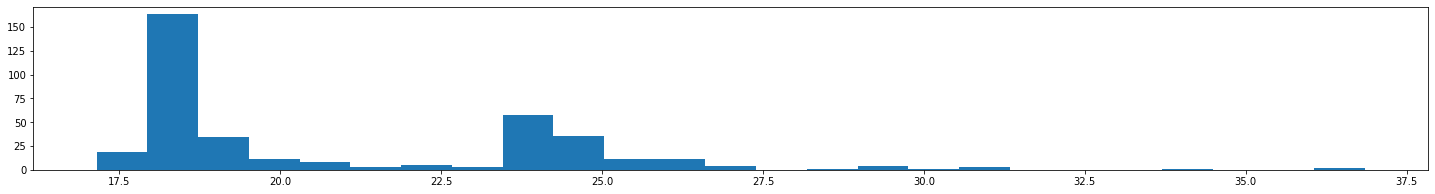

In [33]:
#from sklearn.model_selection import (StratifiedShuffleSplit, StratifiedGroupKFold)
from sklearn.model_selection import LeavePGroupsOut

age_bins = [[17, 21], [21, 25], [25, 29], [29, 36], [36, 50]]
age_bins = [[17, 19], [19, 25], [25, 50]]
age_bins = [[17, 23], [23, 50]]


exp.dataset.df['age_bin'] = np.nan
for (low_age, high_age) in age_bins:
    
    age_name = 'Age\n{}-{}'.format(low_age, high_age)
    exp.dataset.df.loc[(exp.dataset.df['age'] >= low_age) & (exp.dataset.df['age'] < high_age), 'age_bin'] = age_name
dict_encoding = {age_name: age_encoding for age_encoding, age_name in  enumerate(exp.dataset.df['age_bin'].unique())}
 
exp.dataset.df['age_bin_encoded'] = exp.dataset.df['age_bin'].apply(lambda x: dict_encoding[x])

X = exp.dataset.X_train
y = exp.dataset.y_train
    
groups = exp.dataset.df['age_bin_encoded'].to_numpy()
lpgo = LeavePGroupsOut(n_groups=1)
lpgo.get_n_splits(X, y, groups)

#lpgo.get_n_splits(groups=groups)  # 'groups' is always required
fi(25, 3)
_  =plt.hist(exp.dataset.df['age'].to_numpy(), bins=25)

print(exp.dataset.df['age'].quantile(q=[0.5]))

for train_index, test_index in lpgo.split(X, y, groups):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(exp.dataset.df['age_bin_encoded'].iloc[test_index[0]], exp.dataset.df['age_bin'].iloc[test_index[0]])
    display(exp.dataset.df.iloc[test_index].groupby('diagnosis').count())

from scipy.stats import mannwhitneyu

## UMAP visualization of the data samples with overlaying decision boundaries.  

In [18]:
import umap

In [97]:
df =  pd.read_csv(AUTISM_DATA_PATH)


data = Dataset(df=df, 
               missing_data_handling='imputation', 
               imputation_method='knn', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=True,
                use_missing_indicator_variables=False, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

In [60]:
import gower

In [158]:
X  = data.X_train[:, np.array([0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11])]
X_raw = data._X_train

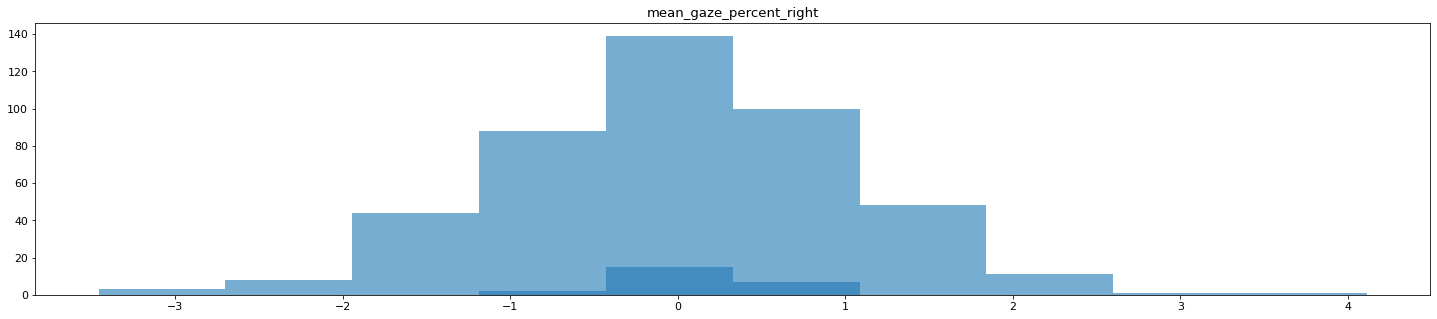

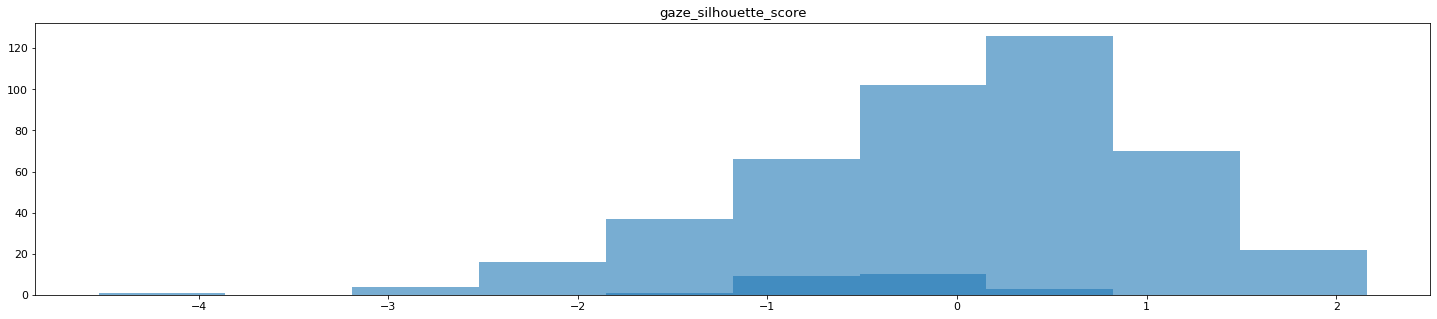

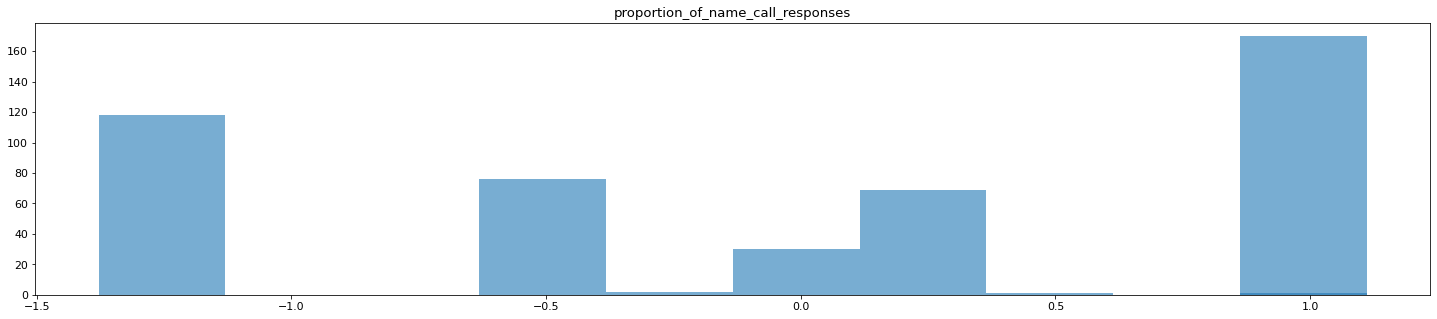

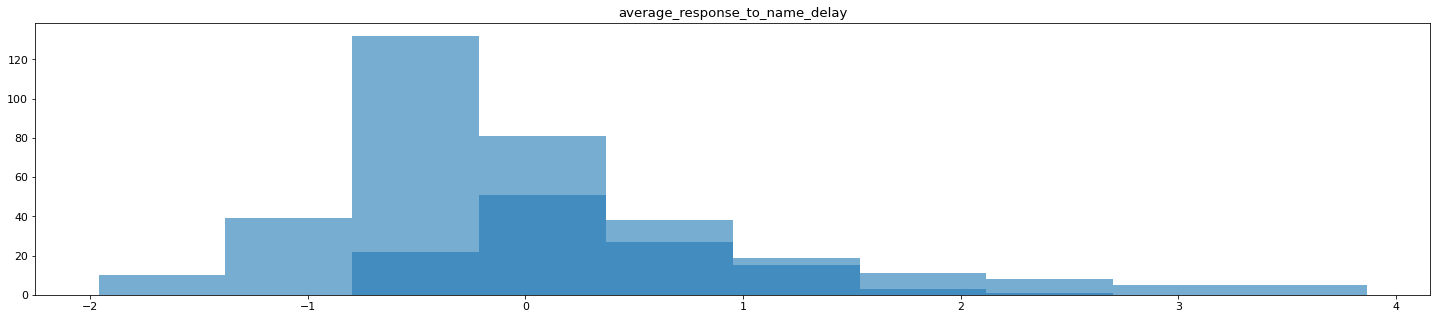

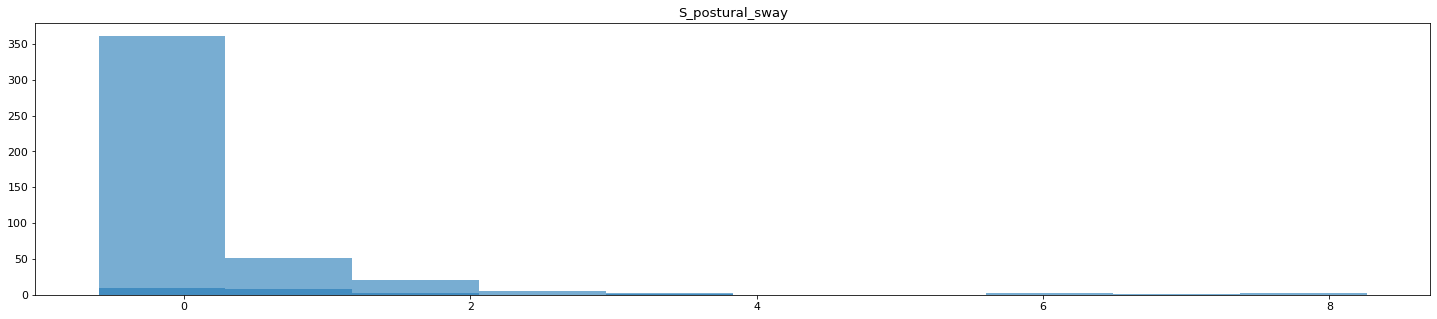

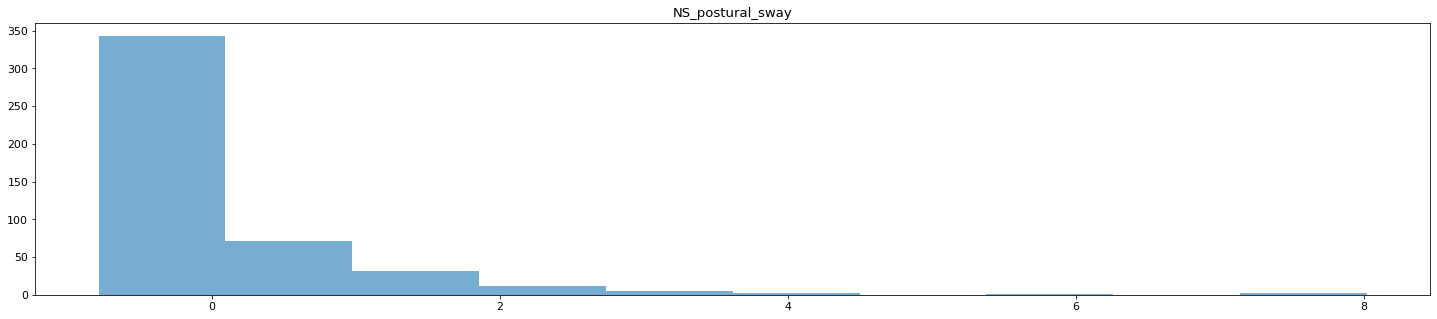

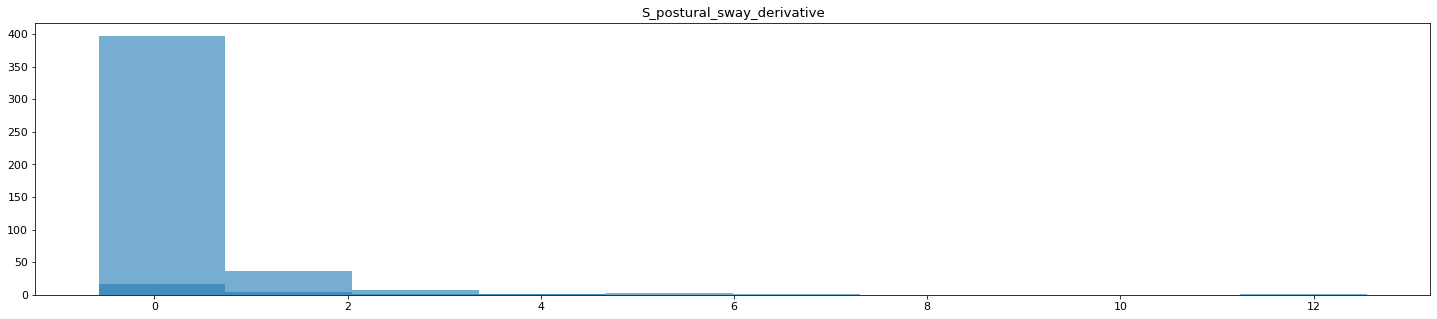

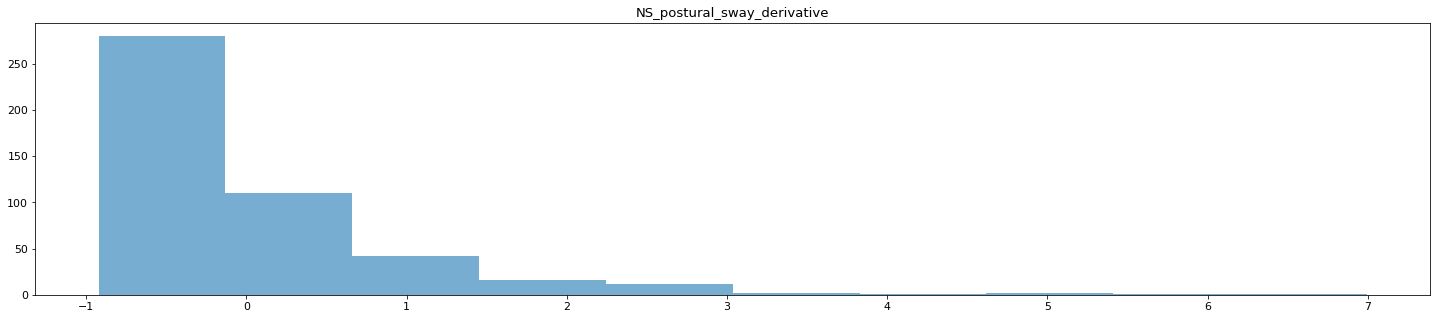

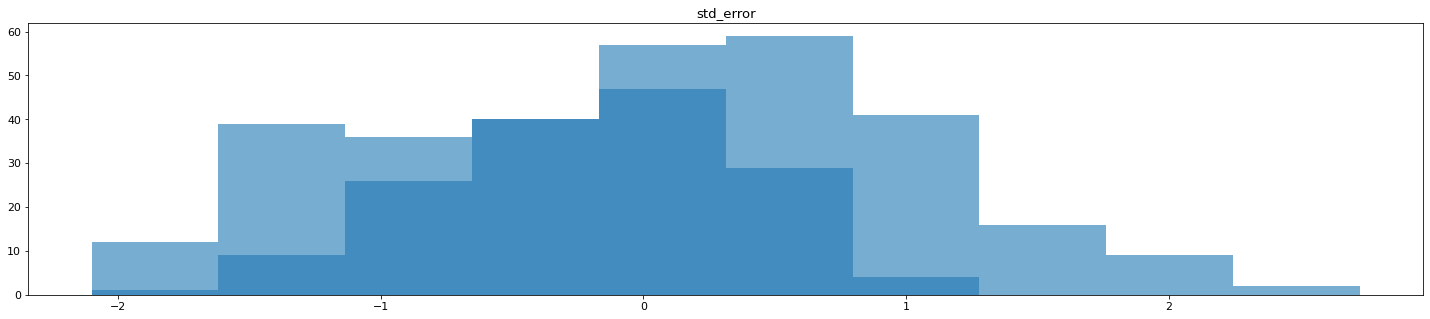

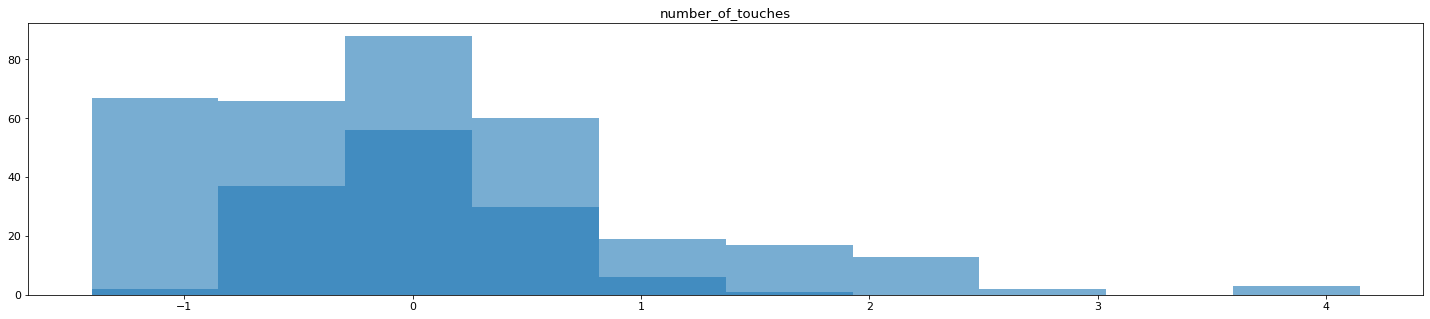

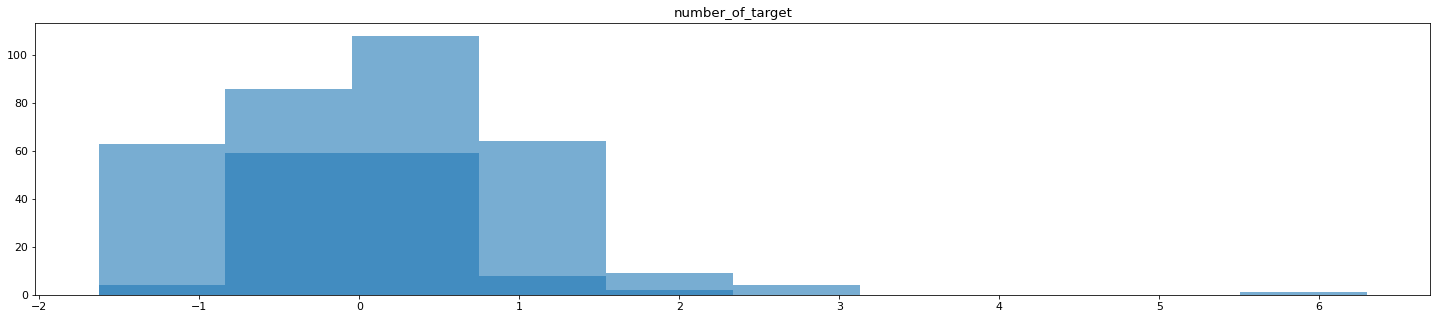

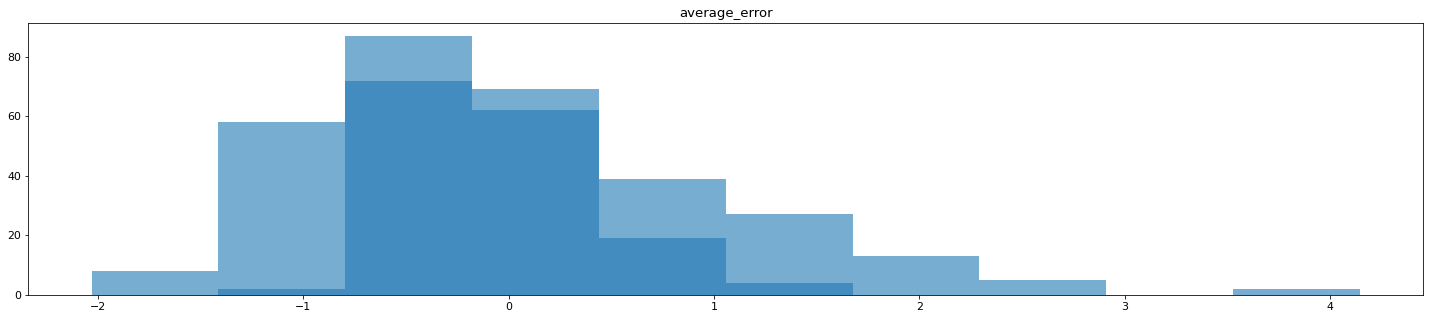

In [115]:
feature_index = 1
for feature_index in range(X.shape[1]):
    fi(25, 5)
    plt.title(data.features_name[feature_index])
    _, bins, _ = plt.hist(X[~np.isnan(X_raw[:, feature_index]), feature_index], color='tab:blue', alpha=.6)
    _ = plt.hist(X[np.isnan(X_raw[:, feature_index]), feature_index], color='tab:blue', bins=bins, alpha=.6)



In [157]:
exp.features_name

['mean_gaze_percent_right',
 'gaze_silhouette_score',
 'proportion_of_name_call_responses',
 'average_response_to_name_delay',
 'S_postural_sway',
 'NS_postural_sway',
 'S_postural_sway_derivative',
 'NS_postural_sway_derivative',
 'std_error',
 'number_of_touches',
 'number_of_target',
 'average_error']

In [120]:
np.mean(gower.gower_matrix(X))

0.16032338

In [178]:
embedding = umap.UMAP(n_neighbors=20,  min_dist = 0,  metric='precomputed').fit_transform(gower.gower_matrix(X)) 

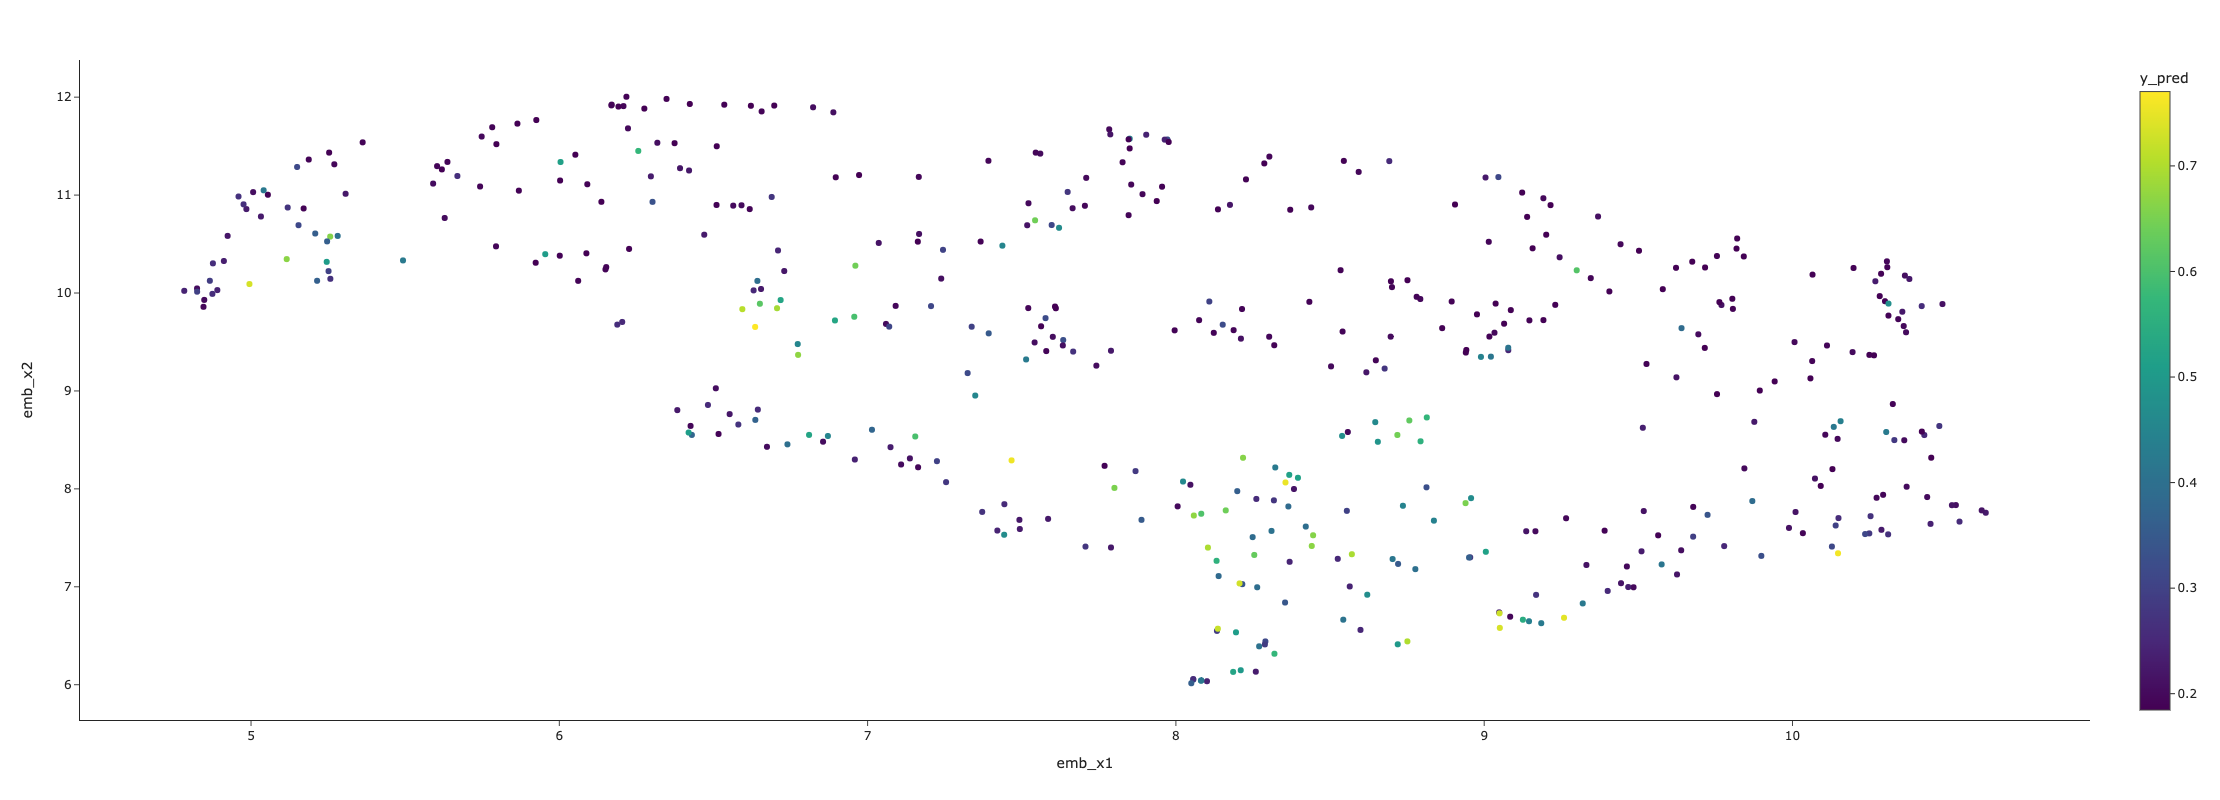

<Figure size 2160x2160 with 0 Axes>

In [179]:
data.df['emb_x1'] = embedding[:,0]
data.df['emb_x2'] = embedding[:,1]
data.df['pred_class'] = exp.predictions_df['pred_class'].to_numpy()
data.df['y_pred'] = exp.predictions_df['y_pred'].to_numpy()

plt.figure(figsize=[30,30])
fig = px.scatter(df, x='emb_x1', y='emb_x2',  hover_name='id', color='y_pred', hover_data=['id', 'age', 'pred_class', data.features_name[0], data.features_name[1]], #symbol='marker', 
                    template="simple_white", width=1300, height=800)
fig.update_traces()#hoverinfo="none",hovertemplate=None)
fig.show()

In [ ]:
df = data.df
mode='jupyterlab'

for i in range(X.shape[1]):
    plt.figure(figsize=[30,30])
    fig = px.scatter(df, x='emb_x1', y='emb_x2',  hover_name='id', color=data.features_name[i], hover_data=['id', 'age', 'pred_class', data.features_name[0], data.features_name[1]], #symbol='marker', 
                        template="simple_white", width=1300, height=800)
    fig.update_traces()#hoverinfo="none",hovertemplate=None)
    fig.show()


In [43]:
app = JupyterDash(__name__)
app.layout = html.Div(
    className="container",
    children=[
        dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True),
        dcc.Tooltip(id="graph-tooltip-5", direction='bottom'),
    ],
)    
@app.callback(
    Output("graph-tooltip-5", "show"),
    Output("graph-tooltip-5", "bbox"),
    Output("graph-tooltip-5", "children"),
    Input("graph-5", "hoverData"),
)
def display_hover(hoverData):
    if hoverData is None:
        return False, no_update, no_update
    print(hoverData)

    # demo only shows the first point, but other points may also be available
    hover_data = hoverData["points"][0]
    bbox = hover_data["bbox"]

    date = hover_data['customdata'][0]

    children = [
        html.Div([
            html.P("date {} diag: {}".format(date, label), style={'font-weight': 'bold'}),
        ])
    ]

    return True, bbox, children
app.run_server(mode=mode, port = 8091, height=800, dev_tools_ui=True,  inline_exceptions=False,#debug=True,
              dev_tools_hot_reload =True, threaded=True)

<Figure size 2160x2160 with 0 Axes>

In [39]:
from dash import Dash, dcc, html, Input, Output, no_update
from jupyter_dash import JupyterDash
import plotly.graph_objects as go
import plotly.express as px

def _lauch_umap_segments(df, mode='jupyterlab'):
    plt.figure(figsize=[30,30])
    fig = px.scatter(df, x='emb_x1', y='emb_x2',  hover_name='id', color='diagnosis', hover_data=['date'], #symbol='marker', 
                        template="simple_white", width=1300, height=800)
    fig.update_traces(hoverinfo="none",hovertemplate=None)


    app = JupyterDash(__name__)
    app.layout = html.Div(
        className="container",
        children=[
            dcc.Graph(id="graph-5", figure=fig, clear_on_unhover=True),
            dcc.Tooltip(id="graph-tooltip-5", direction='bottom'),
        ],
    )    
    @app.callback(
        Output("graph-tooltip-5", "show"),
        Output("graph-tooltip-5", "bbox"),
        Output("graph-tooltip-5", "children"),
        Input("graph-5", "hoverData"),
    )
    def display_hover(hoverData):
        if hoverData is None:
            return False, no_update, no_update
        print(hoverData)

        # demo only shows the first point, but other points may also be available
        hover_data = hoverData["points"][0]
        bbox = hover_data["bbox"]

        date = hover_data['customdata'][0]

        children = [
            html.Div([
                html.P("date {} diag: {}".format(date, label), style={'font-weight': 'bold'}),
            ])
        ]

        return True, bbox, children
    app.run_server(mode=mode, port = 8091, height=800, dev_tools_ui=True,  inline_exceptions=False,#debug=True,
                  dev_tools_hot_reload =True, threaded=True)
    return 

# Overfitting estimation

## Training for different depth

In [227]:
from xgboost import XGBClassifier, plot_importance, plot_tree
model = XGBClassifier(use_label_encoder=False, # TODO ADD PLAYING WITH PARAMETERS 
                      learning_rate=0.01,
                      n_estimators= 100,
                      max_depth = 5,
                      verbosity=1,
                      objective='binary:logistic',
                      eval_metric='auc',
                      booster='gbtree',
                      enable_categorical=True, 
                      scale_pos_weight=417/50,
                      tree_method='gpu_hist',
                      colsample_bytree=.8,
                      subsample=1,
                      reg_lambda=1,
                      gamma=1,
                      reg_alpha=1, 
                      colsample_bylevel=.8,
                      alpha=0)

In [226]:
model

XGBClassifier(alpha=0, base_score=None, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=None, colsample_bytree=0.8,
              enable_categorical=True, eval_metric='auc', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=1, reg_lambda=1,
              scale_pos_weight=8.34, subsample=1, tree_method='gpu_hist',
              use_label_encoder=False, validate_parameters=None, ...)

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 1!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_2  0.821   0.389        0.833             0.138                  0.932                           0.477               0.211     0.878                                    0.41                                               0.52                                                       0.921                                            0.441                                              0.133                                 0.941                                    0.48                             0.559                            0.059  26  384  33  24

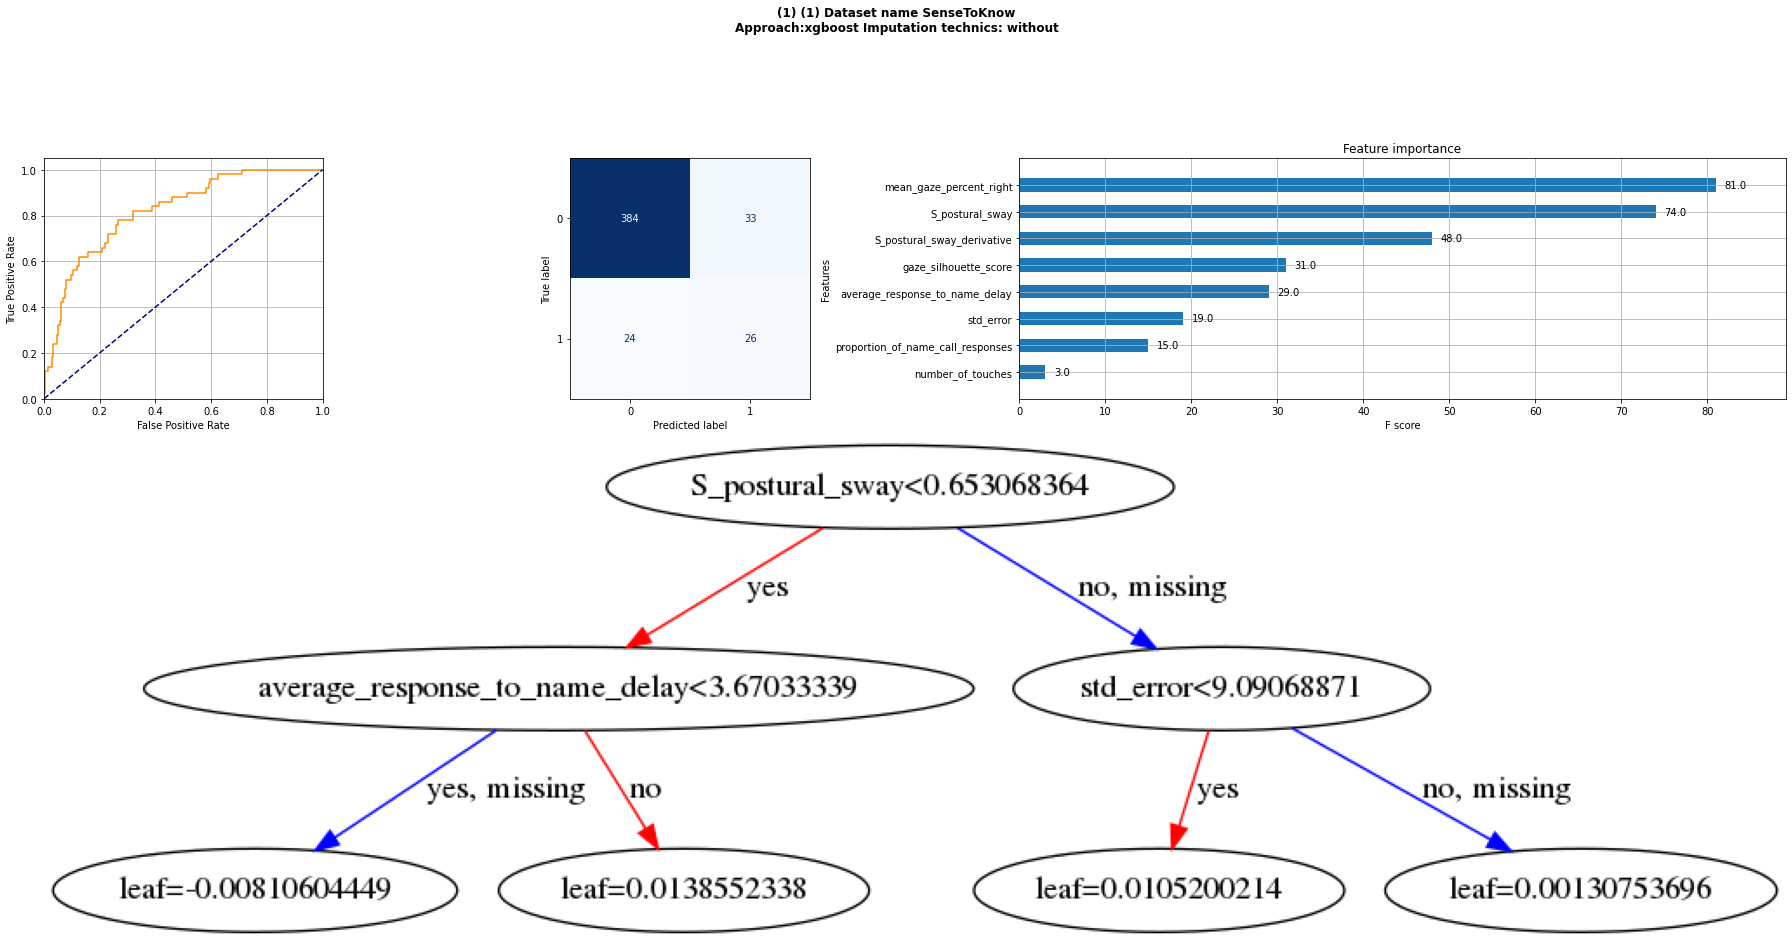

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 3!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_3  0.832   0.394        0.849             0.134                  0.903                           0.474               0.222     0.848                                   0.411                                               0.64                                                       0.873                                            0.376                                              0.105                                 0.953                                    0.36                             0.624                            0.047  32  364  53  18

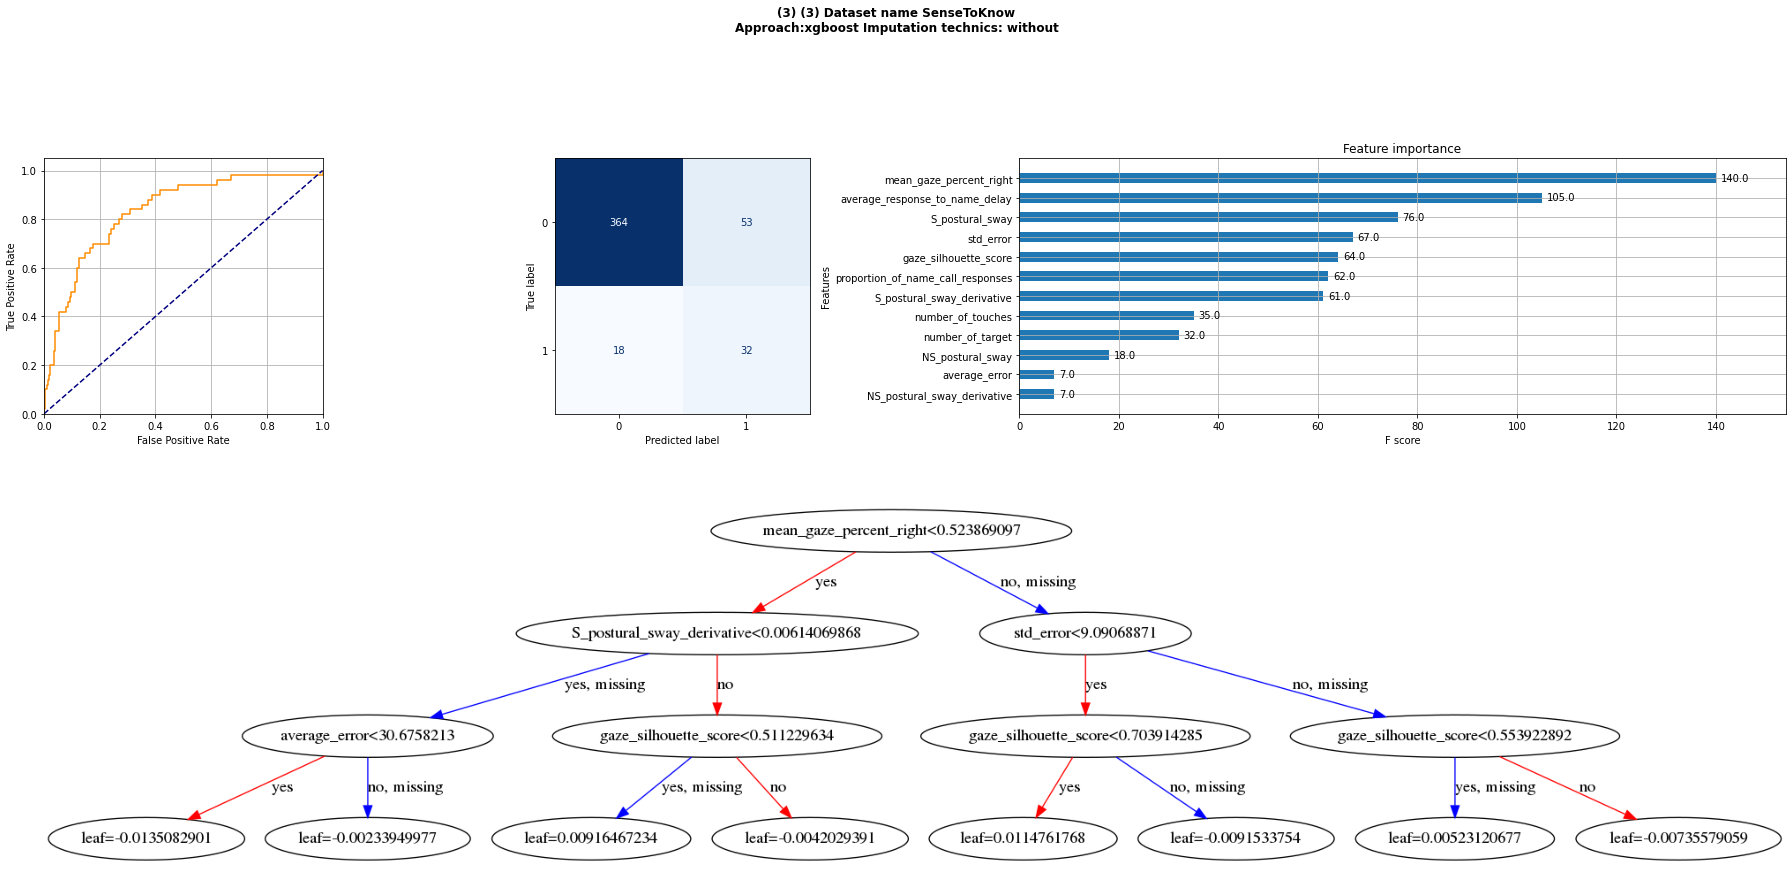

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 4!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_4  0.852   0.448        0.898             0.164                  0.927                           0.492               0.267     0.859                                   0.431                                               0.64                                                       0.885                                              0.4                                              0.114                                 0.953                                    0.36                               0.6                            0.047  32  369  48  18

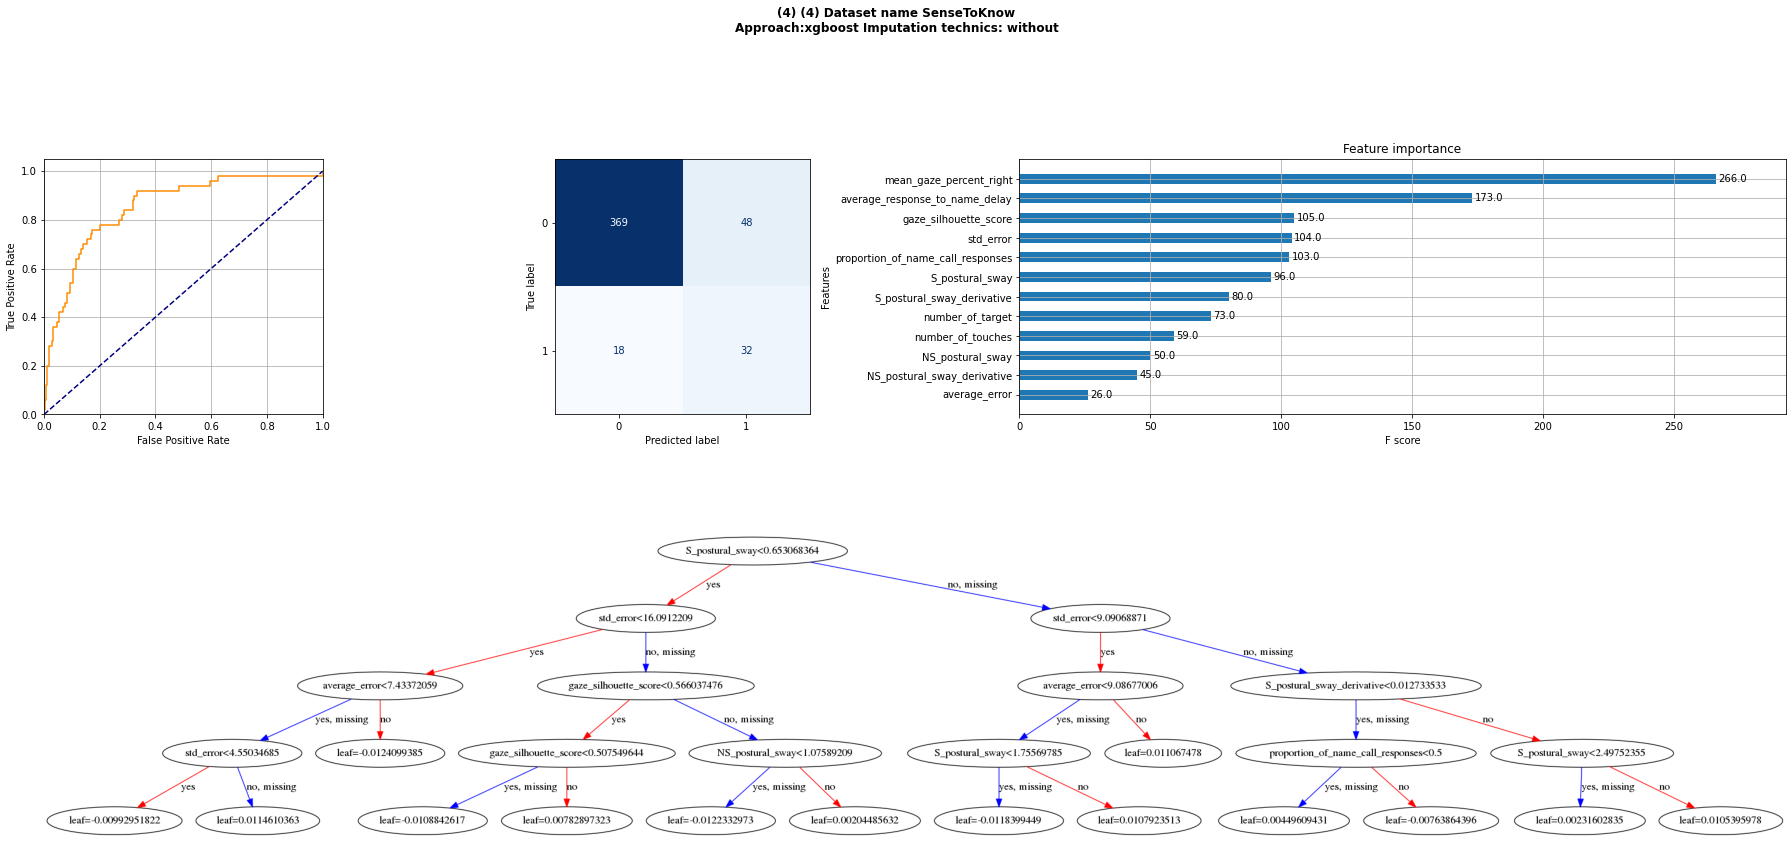

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 6!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_5  0.861   0.494        0.916             0.219                  0.976                           0.512               0.298     0.874                                   0.451                                               0.62                                                       0.904                                            0.437                                              0.131                                 0.952                                    0.38                             0.563                            0.048  31  377  40  19

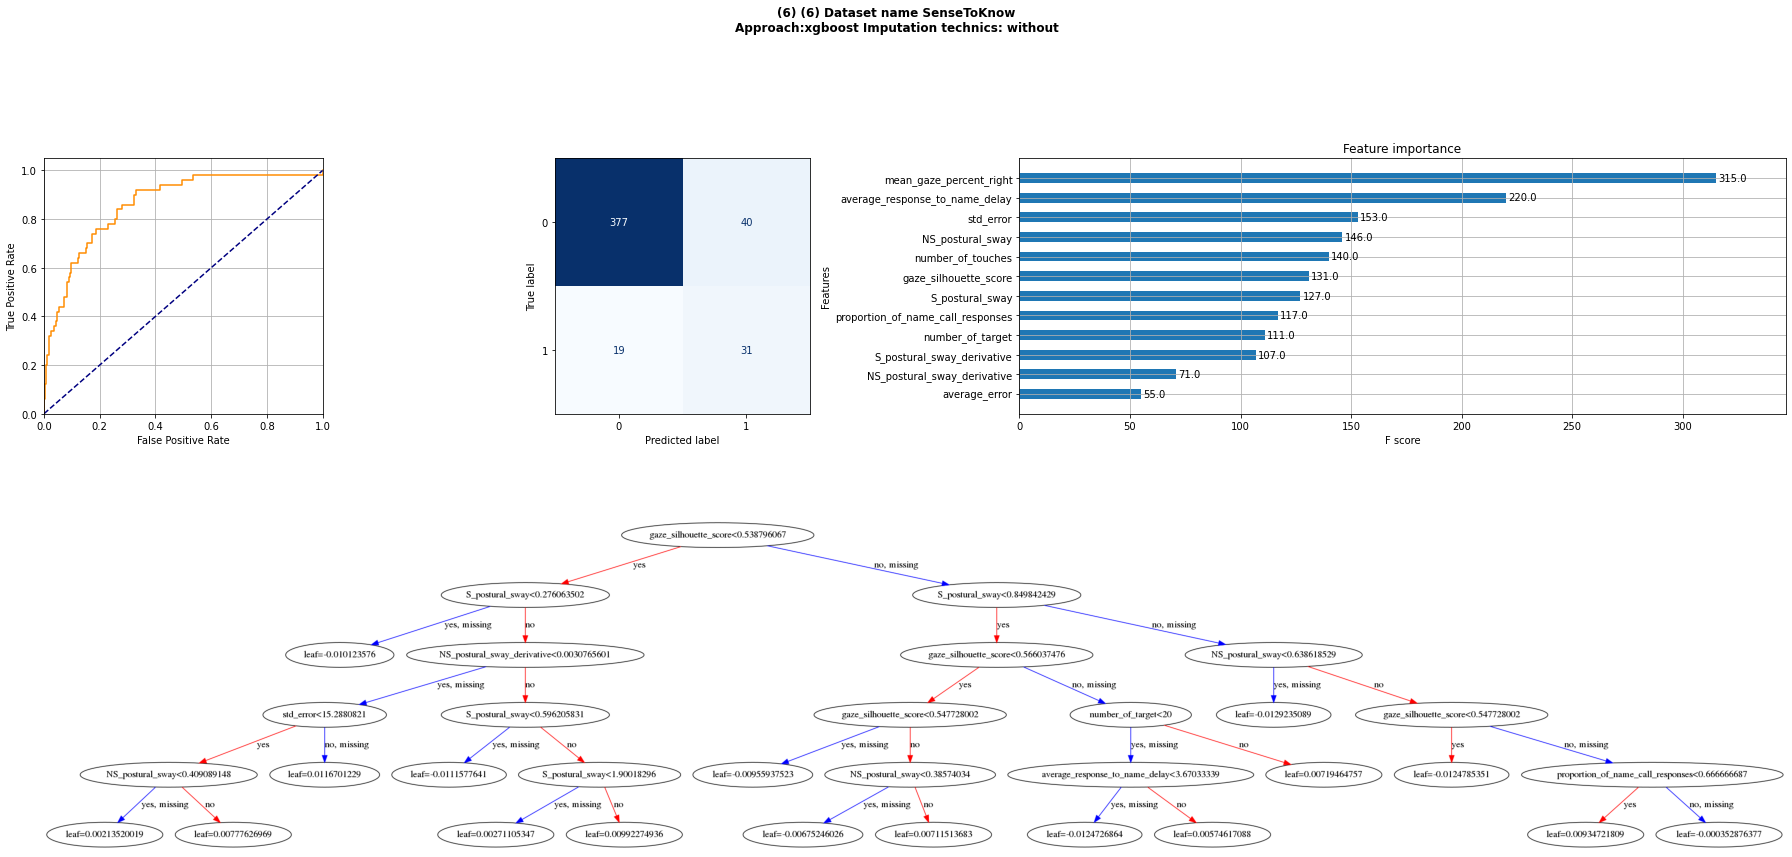

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 7!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_6  0.866   0.505        0.924             0.231                   0.98                           0.513                0.29     0.878                                   0.451                                                0.6                                                       0.911                                            0.448                                              0.136                                  0.95                                     0.4                             0.552                             0.05  30  380  37  20

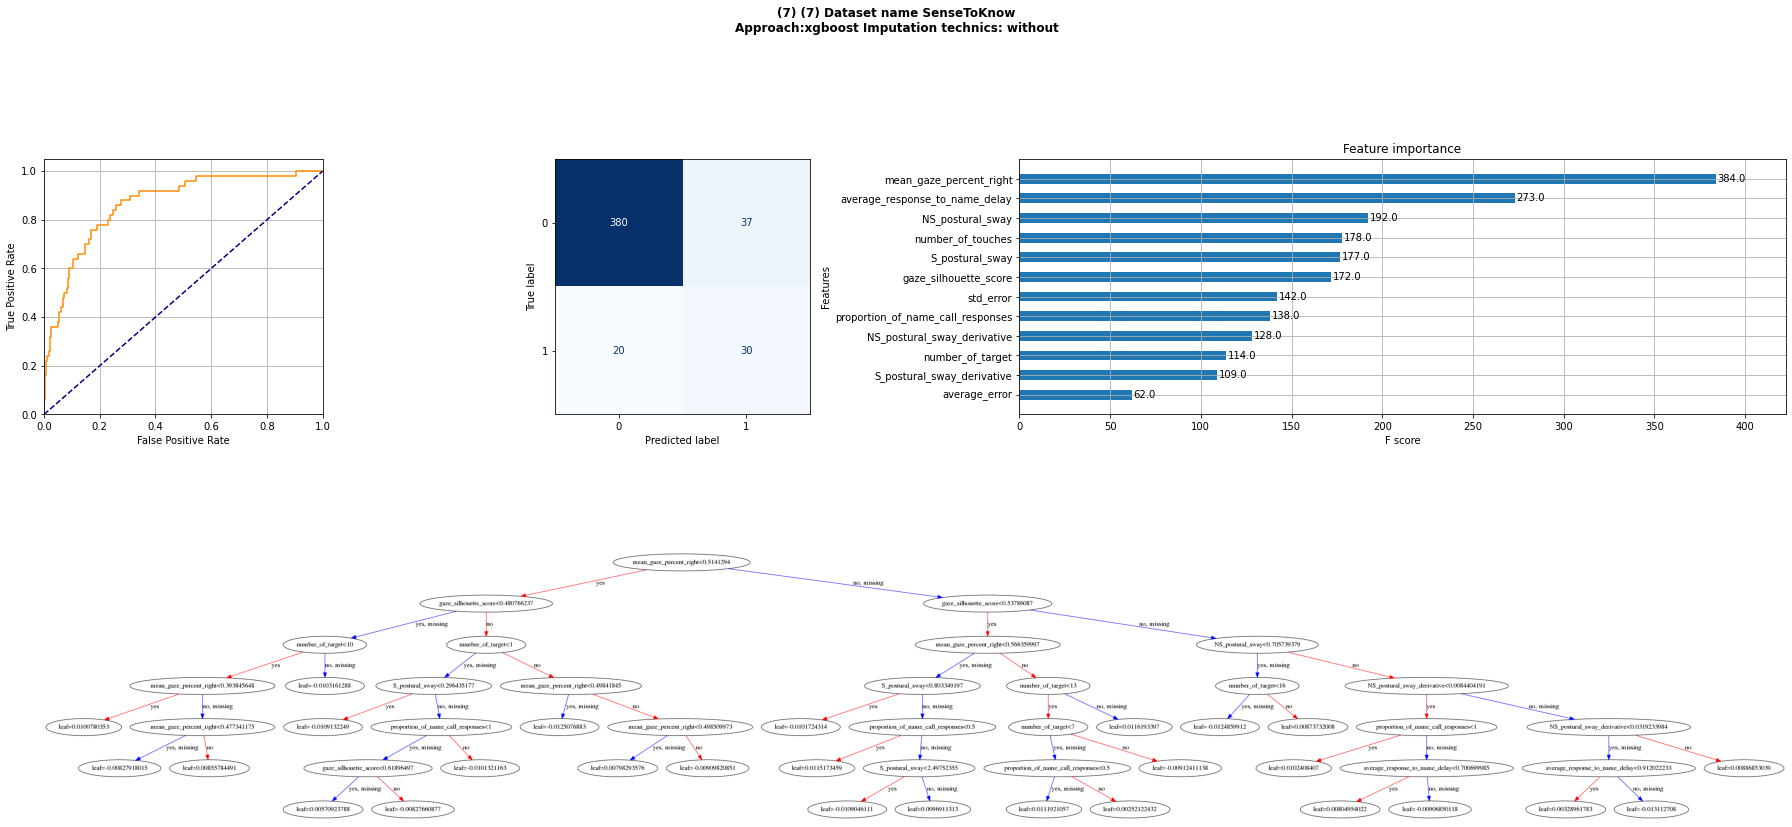

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 8!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_7  0.872   0.515        0.925             0.228                  0.975                           0.559               0.277     0.889                                   0.505                                               0.66                                                       0.916                                            0.485                                              0.155                                 0.957                                    0.34                             0.515                            0.043  33  382  35  17

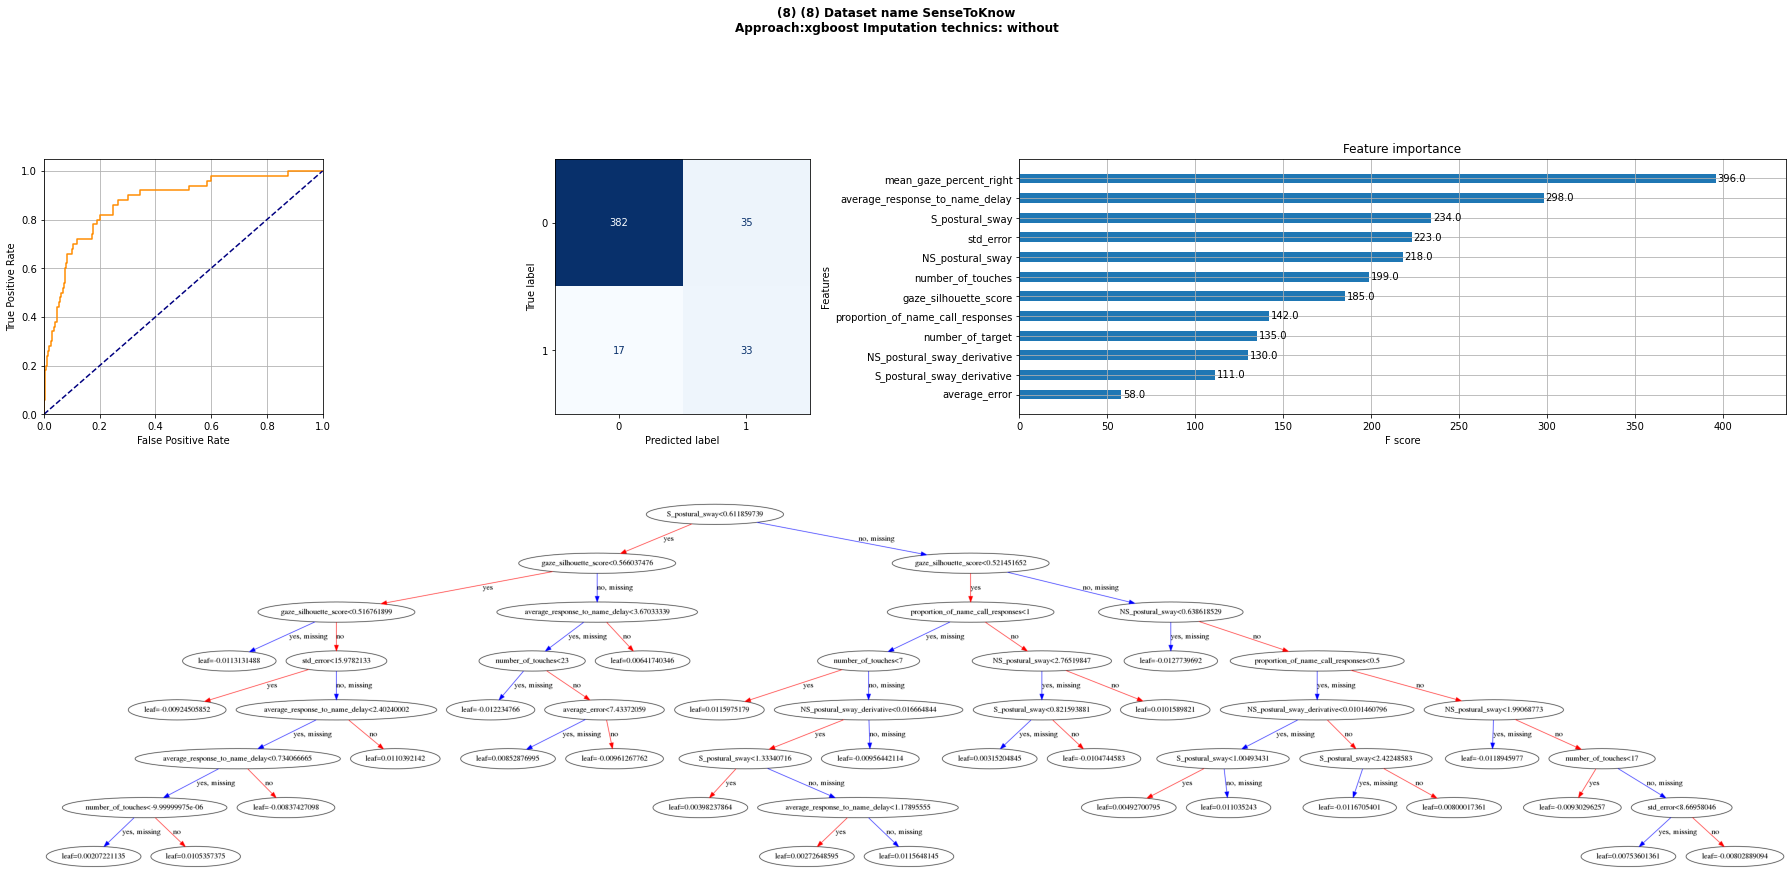

In [5]:


for max_depth in [2, 3, 4, 5, 6, 7]:
    df =  pd.read_csv(AUTISM_DATA_PATH)


    data = Dataset(df=df, 
                   missing_data_handling='without', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                    features_name = DEFAULT_PREDICTORS, 
                    scale_data=False,
                    use_missing_indicator_variables=False, 
                   verbosity=0,
                   scenario='multimodal_2023',#'papers',
                   proportion_train=1)
    exp = Experiments(data.dataset_name,
                      dataset=data, 
                        approach='xgboost', 
                        previous_experiment=None, 
                        experiment_folder_name = 'November_19',
                        experiment_name = 'MaxDepth_{}'.format(max_depth),
                        verbosity=1, 
                        debug=True, 
                        save_experiment=True, 
                        max_depth = max_depth, 
                        scale_pos_weight = np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                        alpha = 0)
    
    exp.fit_predict(num_cv='loocv', 
                    scale_pos_weight=np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                    max_depth = max_depth, 
                    alpha = 0)#num_cv='loocv')#num_cv='loocv')
    exp.plot()

## Analysis of the different overfitting results 

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 10!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0     MaxDepth_10  0.835   0.469        0.916             0.195                  0.951                           0.509               0.275     0.884                                   0.447                                               0.56                                                       0.923                                            0.467                                              0.145                                 0.946                                    0.44                             0.533                            0.054  28  385  32  22

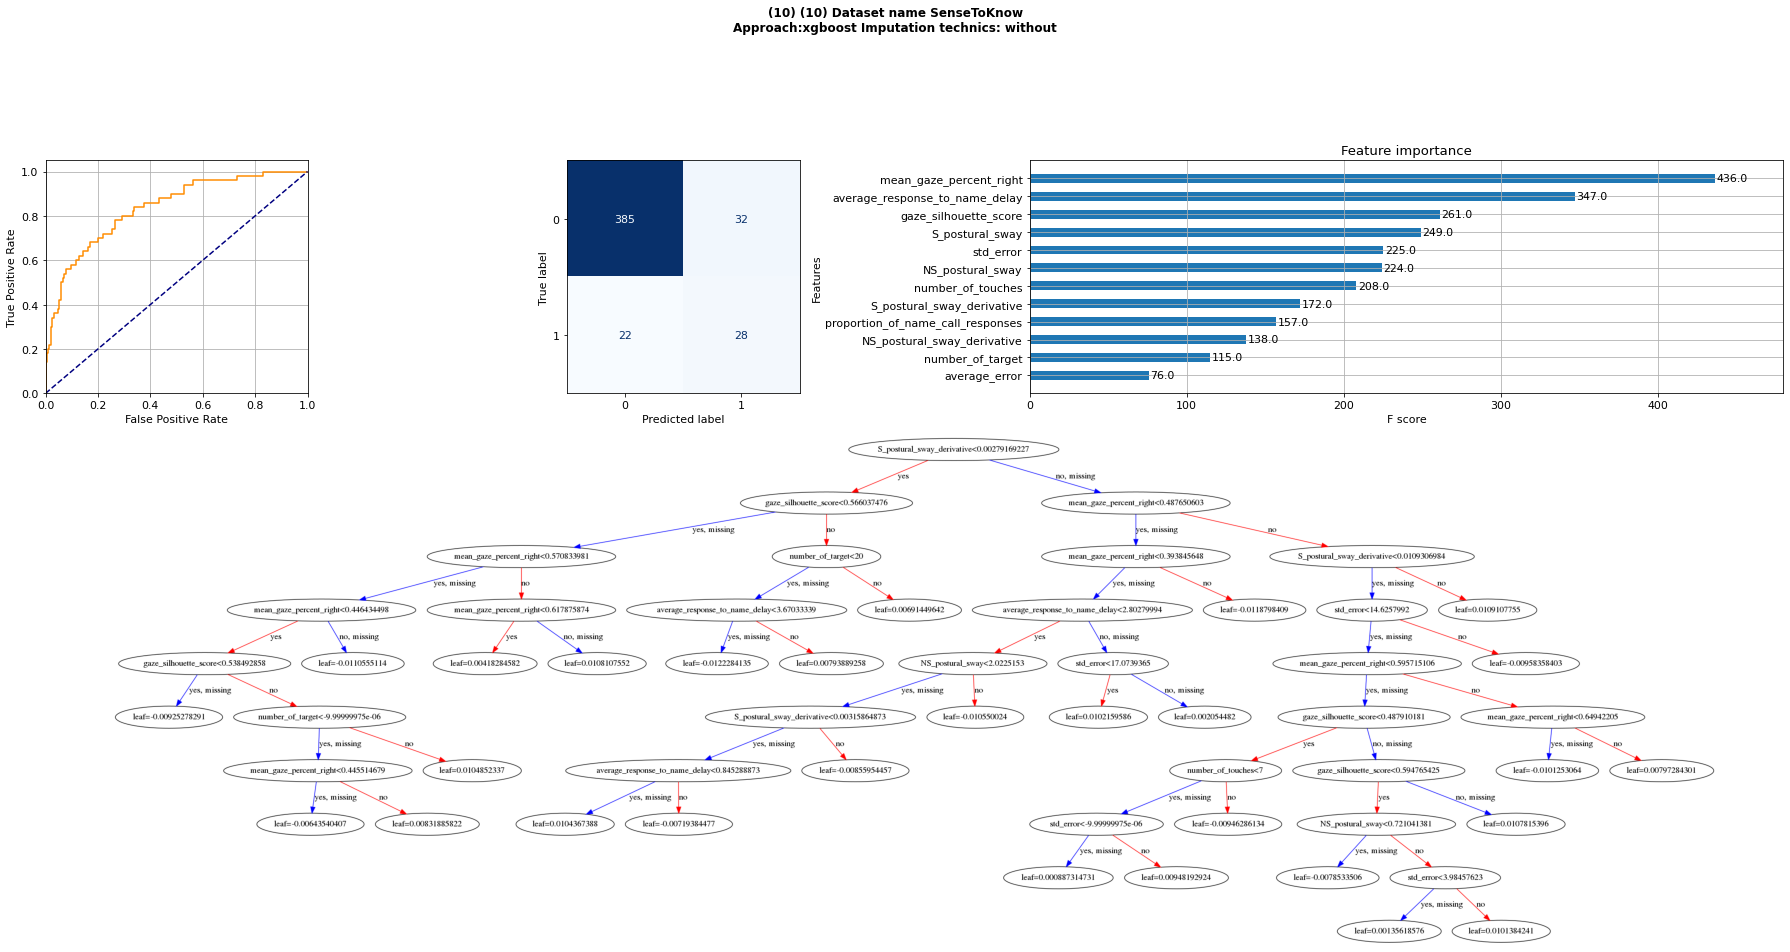

In [228]:


for max_depth in [10]:
    df =  pd.read_csv(AUTISM_DATA_PATH)


    data = Dataset(df=df, 
                   missing_data_handling='without', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                    features_name = DEFAULT_PREDICTORS, 
                    scale_data=False,
                    use_missing_indicator_variables=False, 
                   verbosity=0,
                   scenario='multimodal_2023',#'papers',
                   proportion_train=1)
    exp = Experiments(data.dataset_name,
                      dataset=data, 
                        approach='xgboost', 
                        previous_experiment=None, 
                        experiment_folder_name = 'November_19',
                        experiment_name = 'MaxDepth_{}'.format(max_depth),
                        verbosity=1, 
                        debug=True, 
                        save_experiment=True, 
                        max_depth = max_depth, 
                        scale_pos_weight = np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                        alpha = 0)
    
    exp.fit_predict(num_cv='loocv', 
                    scale_pos_weight=np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                    max_depth = max_depth, 
                    alpha = 0)#num_cv='loocv')#num_cv='loocv')
    exp.plot()

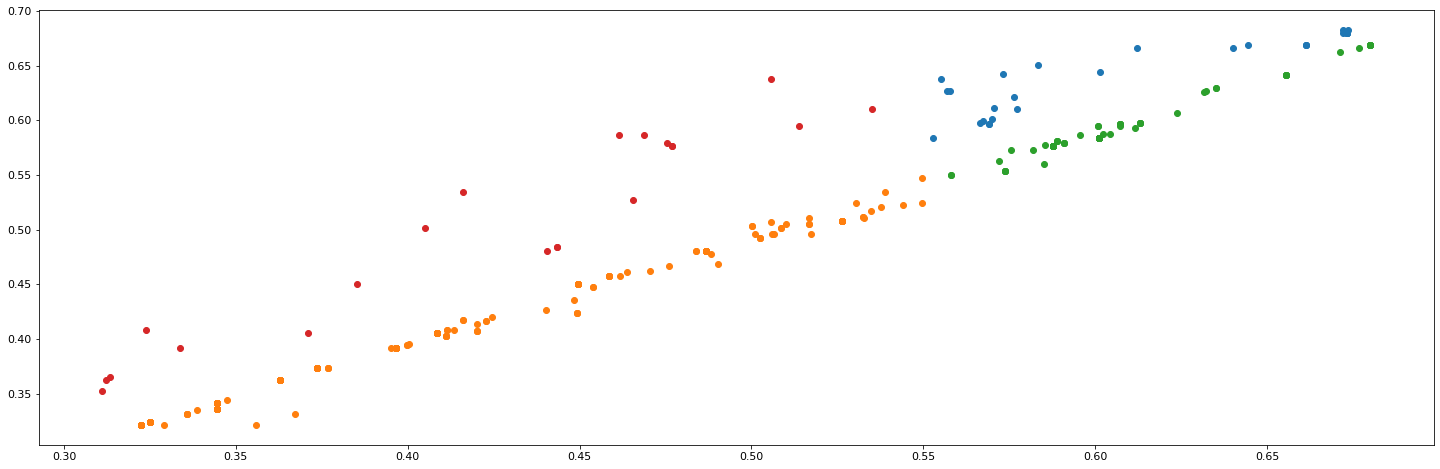

In [216]:
import shap

explainer = shap.TreeExplainer(exp.model)
shap_values = explainer.shap_values(exp.dataset.X_train)
models_expected_value = explainer.expected_value

exp.predictions_df['f_x'] = np.nan
exp.predictions_df['f_x_all'] = np.nan
exp.model.fit(exp.dataset.X_train, exp.dataset.y_train)
exp.predictions_df['y_pred_all'] = exp.model.predict_proba(exp.dataset.X_train)[:, 1]



for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
#exp.predictions_df['y_pred_all'] = 1/(1 + np.exp(-exp.predictions_df['f_x'].to_numpy()))
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]


for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['y_pred_all'].to_numpy(), label=name)
#plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()


467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Loaded experiment at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/1/experiment_log.json'
/!\ No previous computed distribution found at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/1/distributions_None_log.json'
/!\ No previous computed distribution found at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/1/distributions_1_log.json'
/!\ No previous computed distribution found at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/1/distributions_0_log.json'
Experiment 1 loaded successfully! :-)


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_2  0.821   0.389        0.833             0.138                  0.932                           0.477               0.211     0.878                                    0.41                                               0.52                                                       0.921                                            0.441                                              0.133                                 0.941                                    0.48                             0.559                            0.059  26  384  33  24

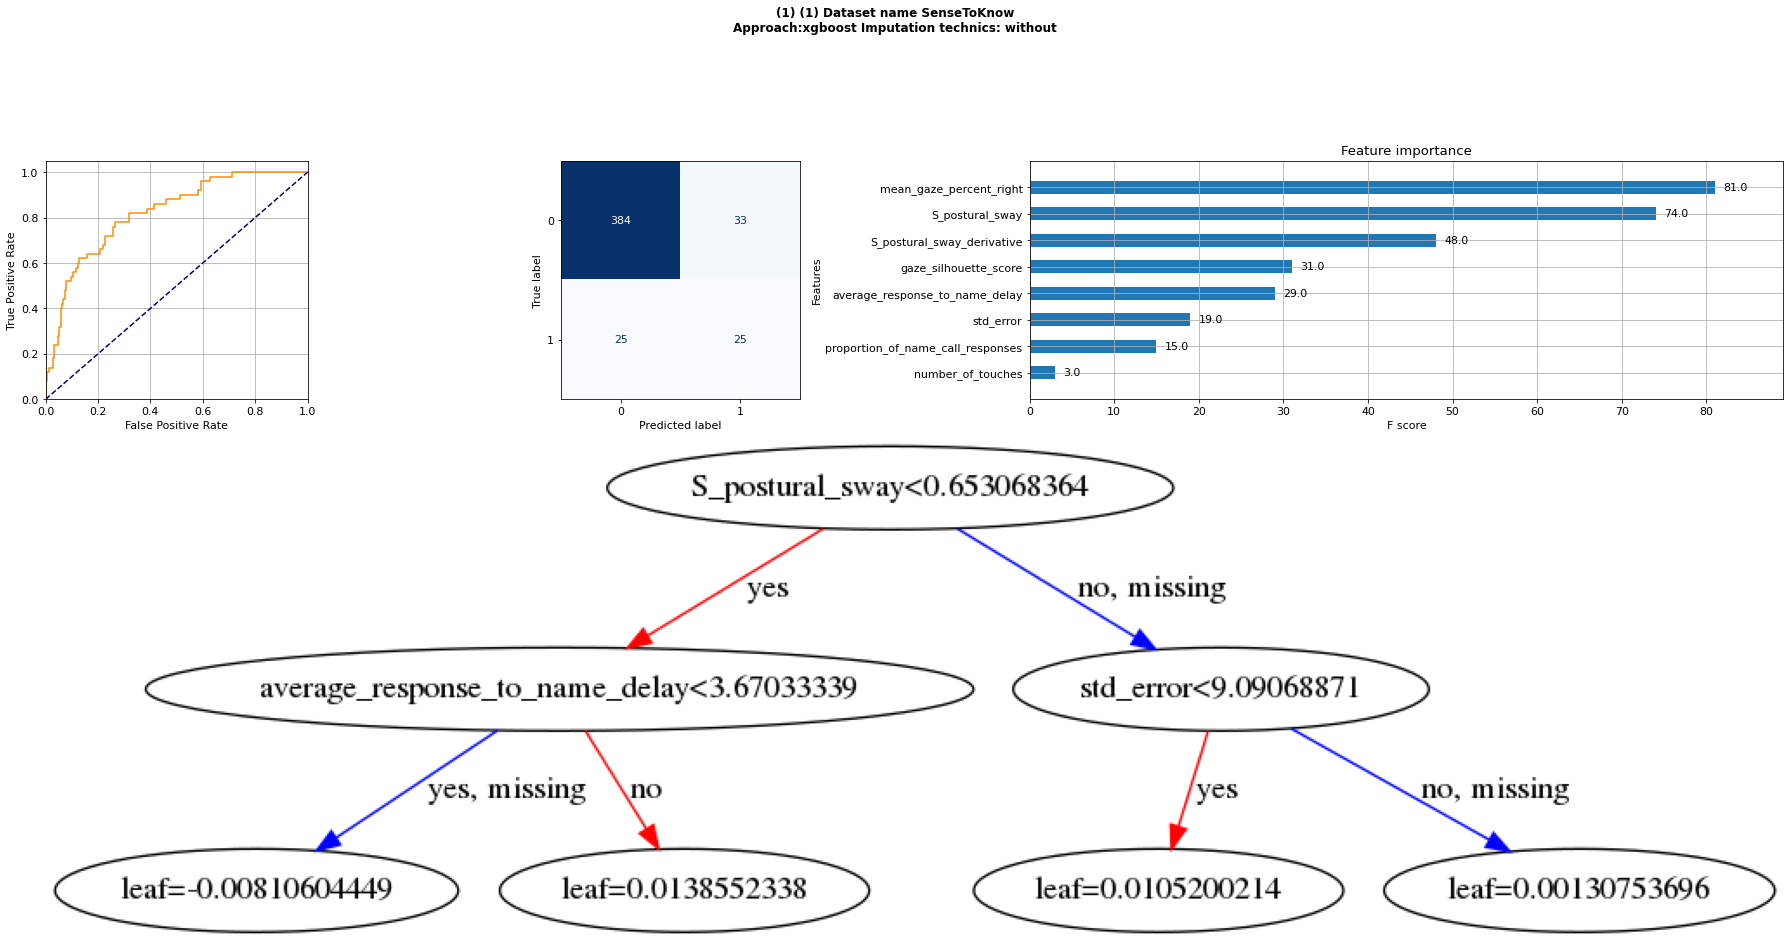

In [210]:
df =  pd.read_csv(AUTISM_DATA_PATH)


data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=1, 
                    experiment_folder_name = 'November_19',
                    experiment_name = None,
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False, 
                    max_depth = None,
                    scale_pos_weight = False, 
                    alpha = 0)

#exp.fit_predict(num_cv='loocv', 
#                scale_pos_weight=np.sum(data.y_train==0)/np.sum(data.y_train==1), 
#                max_depth = max_depth, 
#                alpha = 0)#num_cv='loocv')#num_cv='loocv')
exp.plot()

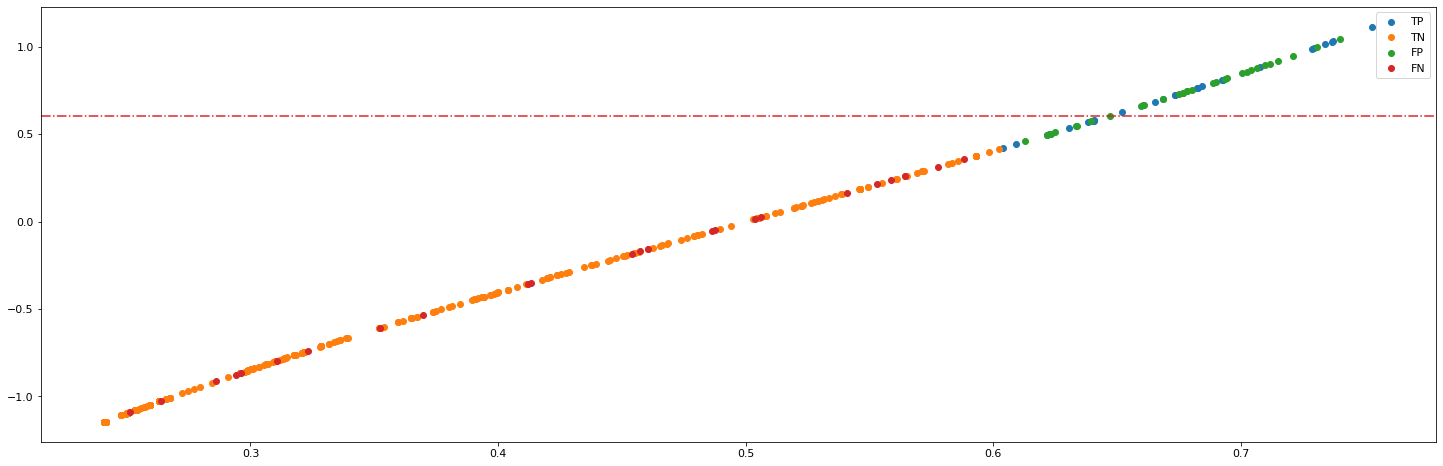

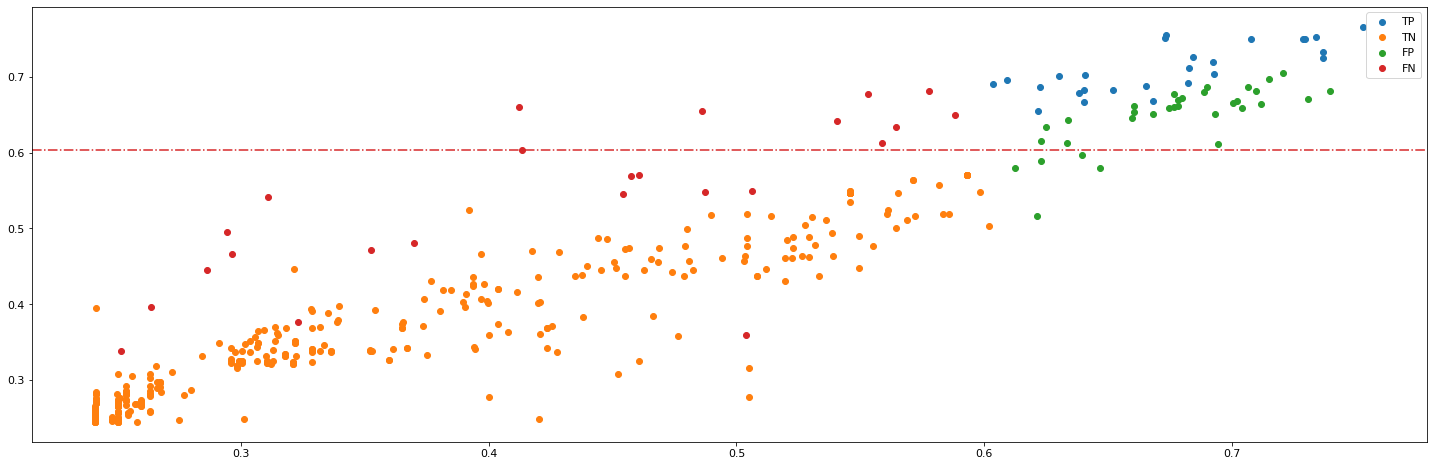

In [212]:
import shap

explainer = shap.TreeExplainer(exp.model)
shap_values = explainer.shap_values(exp.dataset.X_train)
models_expected_value = explainer.expected_value

exp.predictions_df['f_x'] = np.nan
exp.predictions_df['f_x_all'] = np.nan
exp.model.fit(exp.dataset.X_train, exp.dataset.y_train)
exp.predictions_df['y_pred_all'] = exp.model.predict_proba(exp.dataset.X_train)[:, 1]



for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
#exp.predictions_df['y_pred_all'] = 1/(1 + np.exp(-exp.predictions_df['f_x'].to_numpy()))
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]


for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['y_pred_all'].to_numpy(), label=name)
#plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()


467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Loaded experiment at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/8/experiment_log.json'
/!\ No previous computed distribution found at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/8/distributions_None_log.json'
/!\ No previous computed distribution found at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/8/distributions_1_log.json'
/!\ No previous computed distribution found at '/home01/sam/notes_on_stats/doc/src/data/November_19/SenseToKnow/8/distributions_0_log.json'
Experiment 8 loaded successfully! :-)


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0      MaxDepth_7  0.872   0.515        0.925             0.228                  0.975                           0.559               0.277     0.889                                   0.505                                               0.66                                                       0.916                                            0.485                                              0.155                                 0.957                                    0.34                             0.515                            0.043  33  382  35  17

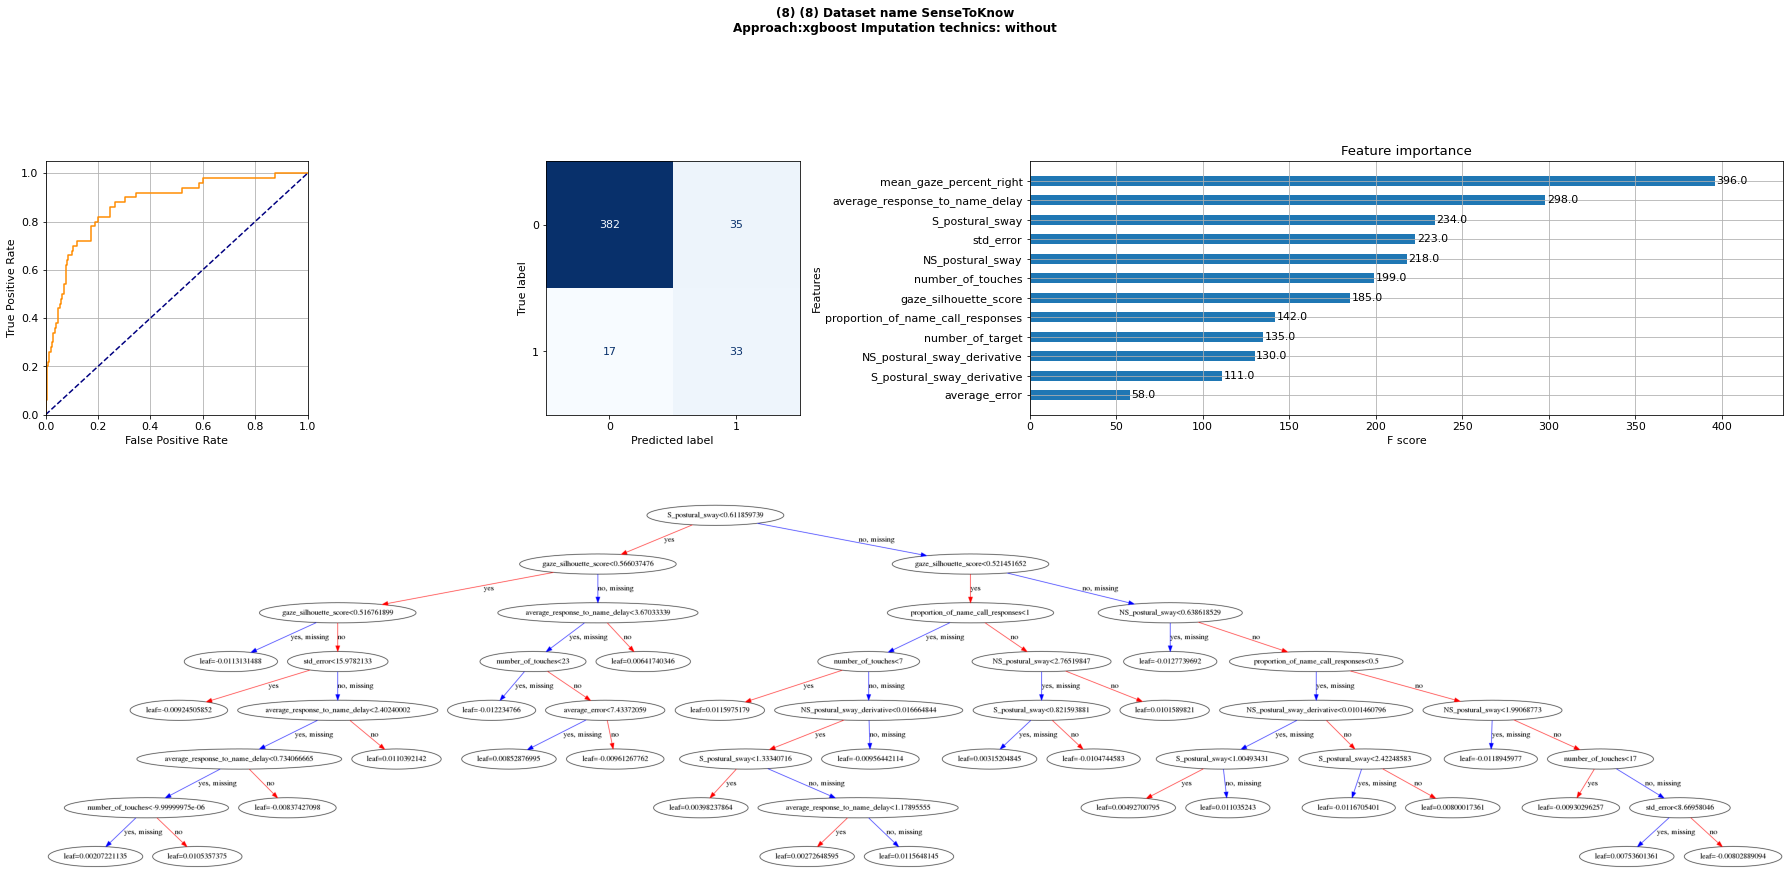

In [213]:
df =  pd.read_csv(AUTISM_DATA_PATH)


data = Dataset(df=df, 
               missing_data_handling='without', 
               imputation_method='without', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)
exp = Experiments(data.dataset_name,
                  dataset=data, 
                    approach='xgboost', 
                    previous_experiment=8, 
                    experiment_folder_name = 'November_19',
                    experiment_name = None,
                    verbosity=1, 
                    debug=True, 
                    save_experiment=False, 
                    max_depth = None,
                    scale_pos_weight = False, 
                    alpha = 0)

#exp.fit_predict(num_cv='loocv', 
#                scale_pos_weight=np.sum(data.y_train==0)/np.sum(data.y_train==1), 
#                max_depth = max_depth, 
#                alpha = 0)#num_cv='loocv')#num_cv='loocv')
exp.plot()

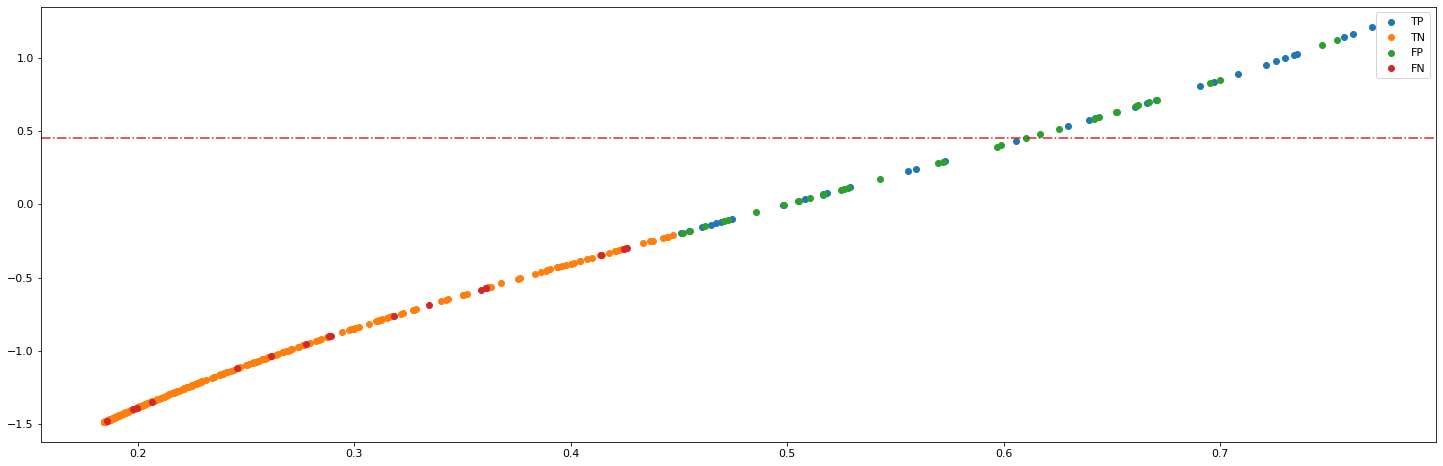

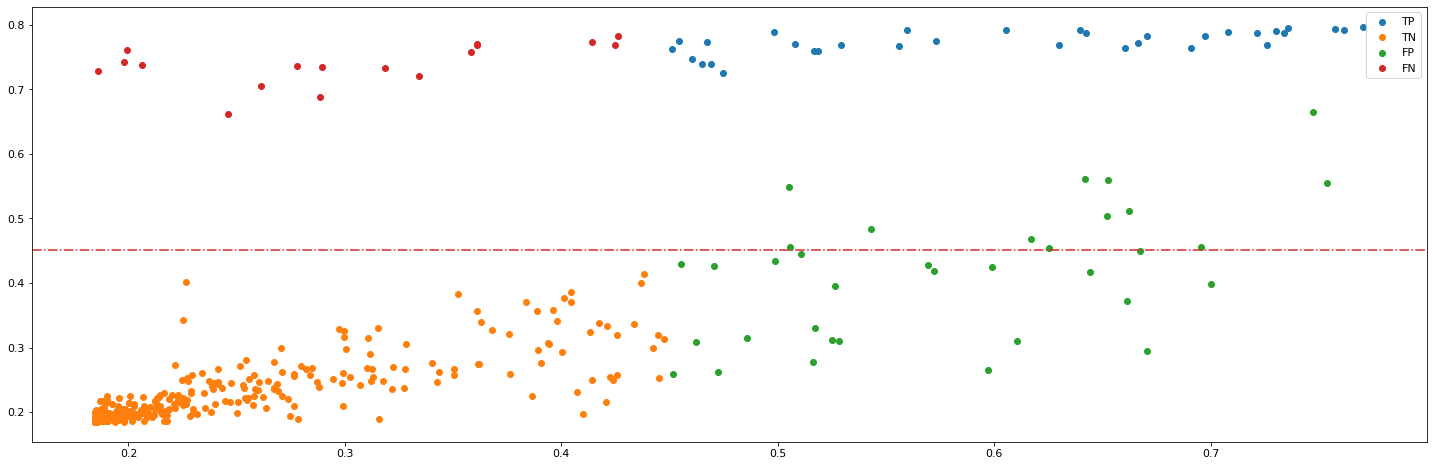

In [214]:
import shap

explainer = shap.TreeExplainer(exp.model)
shap_values = explainer.shap_values(exp.dataset.X_train)
models_expected_value = explainer.expected_value

exp.predictions_df['f_x'] = np.nan
exp.predictions_df['f_x_all'] = np.nan
exp.model.fit(exp.dataset.X_train, exp.dataset.y_train)
exp.predictions_df['y_pred_all'] = exp.model.predict_proba(exp.dataset.X_train)[:, 1]



for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
#exp.predictions_df['y_pred_all'] = 1/(1 + np.exp(-exp.predictions_df['f_x'].to_numpy()))
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]





for idx in range(exp.dataset.num_samples):
    exp.predictions_df.loc[idx, 'f_x'] = exp.shap_values[idx].sum() +  exp.models_expected_value[idx]
    exp.predictions_df.loc[idx, 'f_x_all'] = explainer.shap_values(exp.dataset.X_train)[idx].sum() +  explainer.expected_value
    
    
exp.predictions_df.sort_values(by='f_x')[['y_pred', 'y_true','f_x', 'TP', 'TN', 'FP', 'FN']]#[:30]

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['f_x'].to_numpy(), label=name)
plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()

fi(25, 8);ax=plt.gca()
for name in ['TP', 'TN', 'FP', 'FN']:
    plt.scatter(exp.predictions_df[exp.predictions_df[name]==1]['y_pred'].to_numpy(), exp.predictions_df[exp.predictions_df[name]==1]['y_pred_all'].to_numpy(), label=name)
plt.axhline(exp.optimal_threshold, color='tab:red', linestyle='-.');plt.legend()


467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 2!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  scale_pos_weight_With  0.852   0.453        0.886             0.154                  0.906                           0.559               0.317     0.895                                   0.503                                               0.62                                                       0.928                                            0.508                                              0.167                                 0.953                                    0.38                             0.492                            0.047  31  387  30  19

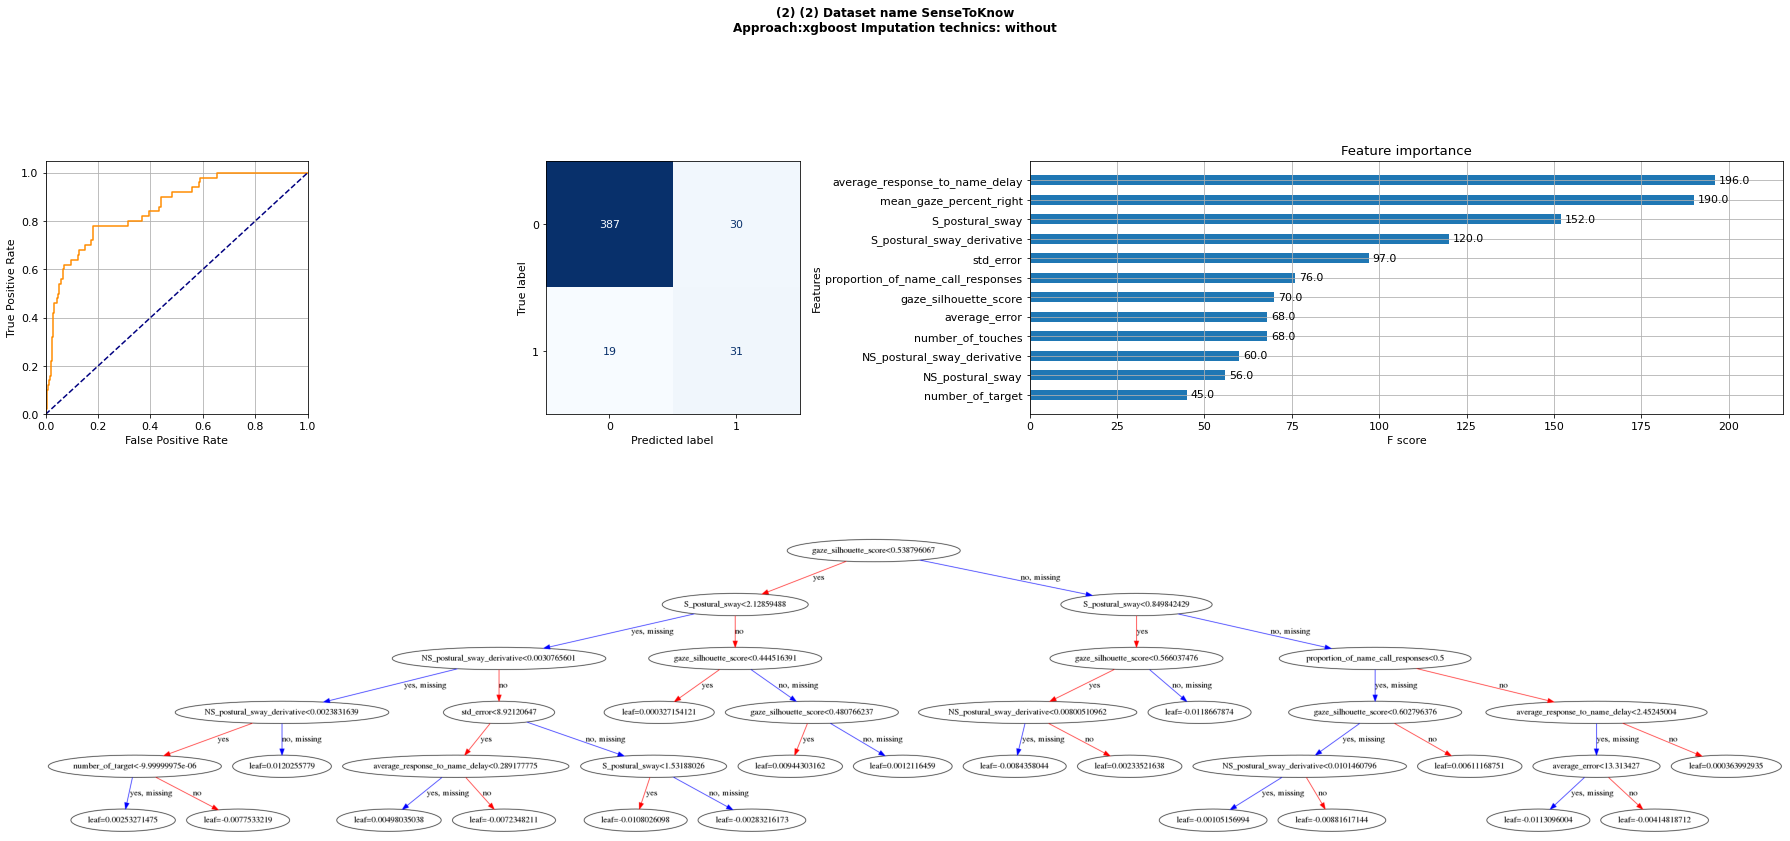

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

Saving experiment in folder November_19.
Doing experiment 5!


experiment_name  AUROC  AUC-PR  AUC-PR-Gain  AUC-PR-Corrected  AUC-PR-Gain-Corrected  F1 score (2 PPVxTPR/(PPV+TPR))  F1 score Corrected  Accuracy  Matthews correlation coefficient (MCC)  Sensitivity, recall, hit rate, or true positive rate (TPR)  Specificity, selectivity or true negative rate (TNR)  Precision or positive predictive value (PPV)  Corrected Precision or positive predictive value (PPV)  Negative predictive value (NPV)  Miss rate or false negative rate (FNR)  False discovery rate (FDR=1-PPV)  False omission rate (FOR=1-NPV)  TP   TN  FP  FN
0  scale_pos_weight_Without  0.861   0.494        0.916             0.219                  0.976                           0.512               0.298     0.874                                   0.451                                               0.62                                                       0.904                                            0.437                                              0.131                                 0.952                                    0.38                             0.563                            0.048  31  377  40  19

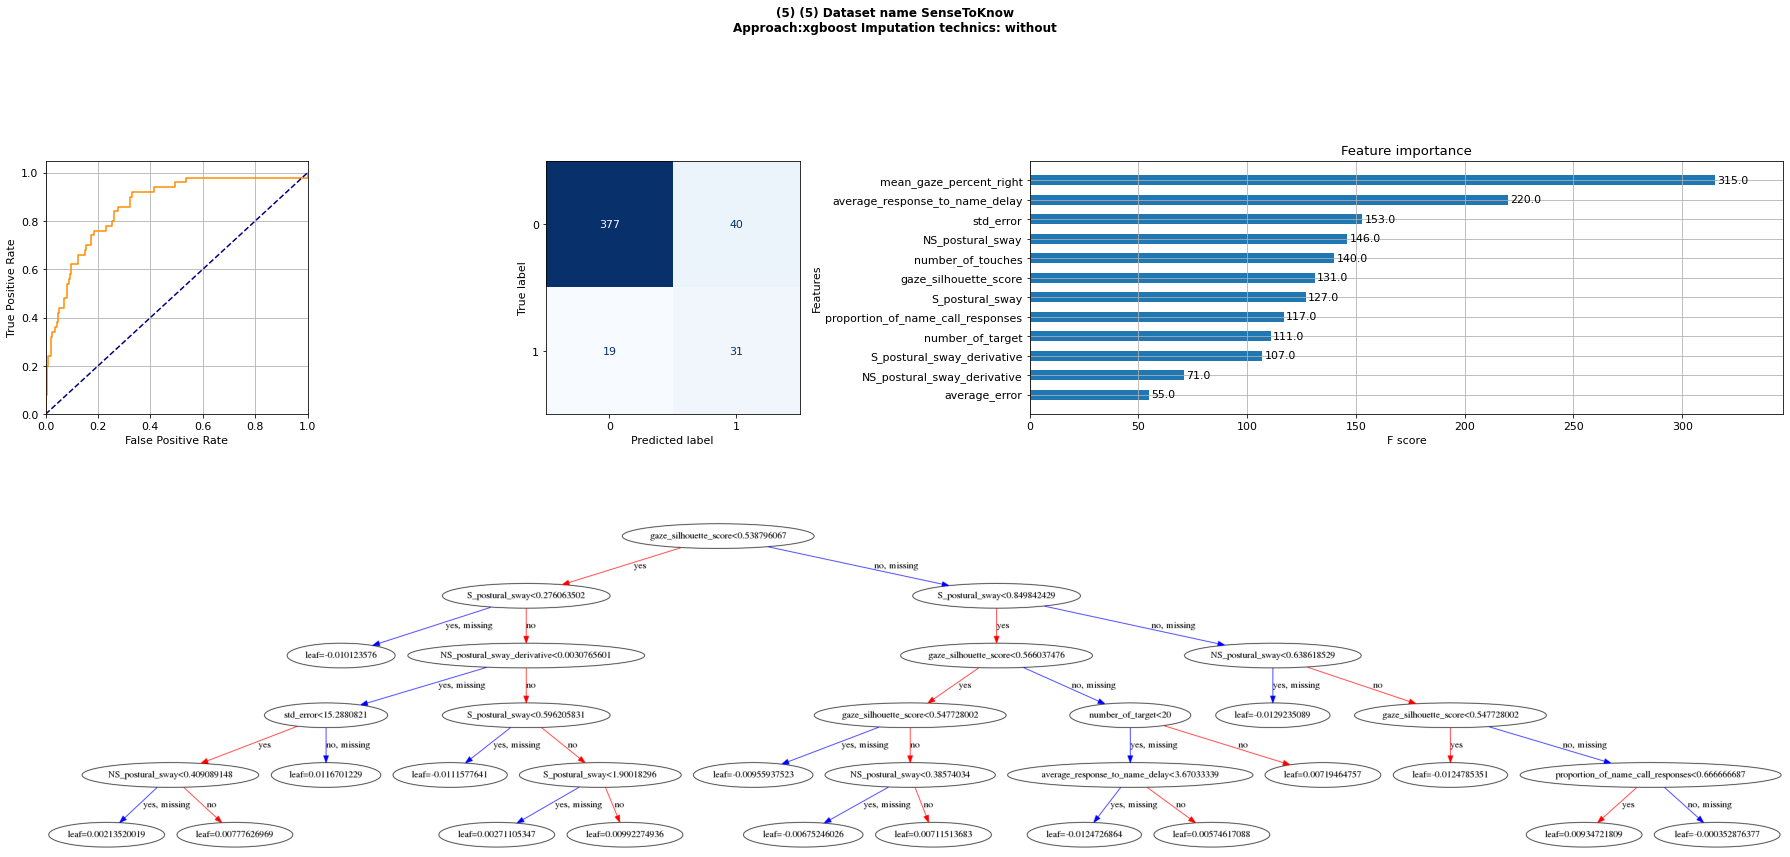

In [12]:
for name, scale_pos_weight in zip(['With', 'Without'], [None, 417/50]):
    df =  pd.read_csv(AUTISM_DATA_PATH)


    data = Dataset(df=df, 
                   missing_data_handling='without', 
                   imputation_method='without', 
                   sampling_method='without',
                   outcome_column='diagnosis',
                    features_name = DEFAULT_PREDICTORS, 
                    scale_data=False,
                    use_missing_indicator_variables=False, 
                   verbosity=0,
                   scenario='multimodal_2023',#'papers',
                   proportion_train=1)
    exp = Experiments(data.dataset_name,
                      dataset=data, 
                        approach='xgboost', 
                        previous_experiment=None, 
                        experiment_folder_name = 'November_19',
                        experiment_name = 'scale_pos_weight_{}'.format(name),
                        verbosity=1, 
                        debug=True, 
                        save_experiment=True, 
                        max_depth = 5, 
                        scale_pos_weight = scale_pos_weight, 
                        alpha = 0)
    
    exp.fit_predict(num_cv='loocv', 
                    scale_pos_weight=scale_pos_weight, 
                    max_depth = 5, 
                    alpha = 0)#num_cv='loocv')#num_cv='loocv')
    exp.plot()

# Gower distance and U-MAP clustering 

In [424]:
pip install gower

Note: you may need to restart the kernel to use updated packages.


In [435]:
df =  pd.read_csv(AUTISM_DATA_PATH)


data = Dataset(df=df, 
               missing_data_handling='imputation', 
               imputation_method='mean', 
               sampling_method='without',
               outcome_column='diagnosis',
                features_name = DEFAULT_PREDICTORS, 
                scale_data=False,
                use_missing_indicator_variables=False, 
               verbosity=0,
               scenario='multimodal_2023',#'papers',
               proportion_train=1)

X = exp.dataset.X_train

467 administrations left.


id
diagnosis     
0.0        417
1.0         50

In [436]:
import gower

fi(25, 25)
plt.imshow(gower.gower_matrix(X))

In [437]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

dm = gower.gower_matrix(X)
Zd = linkage(dm) 

In [438]:
cld = fcluster(Zd, 2, criterion='maxclust')
cld

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

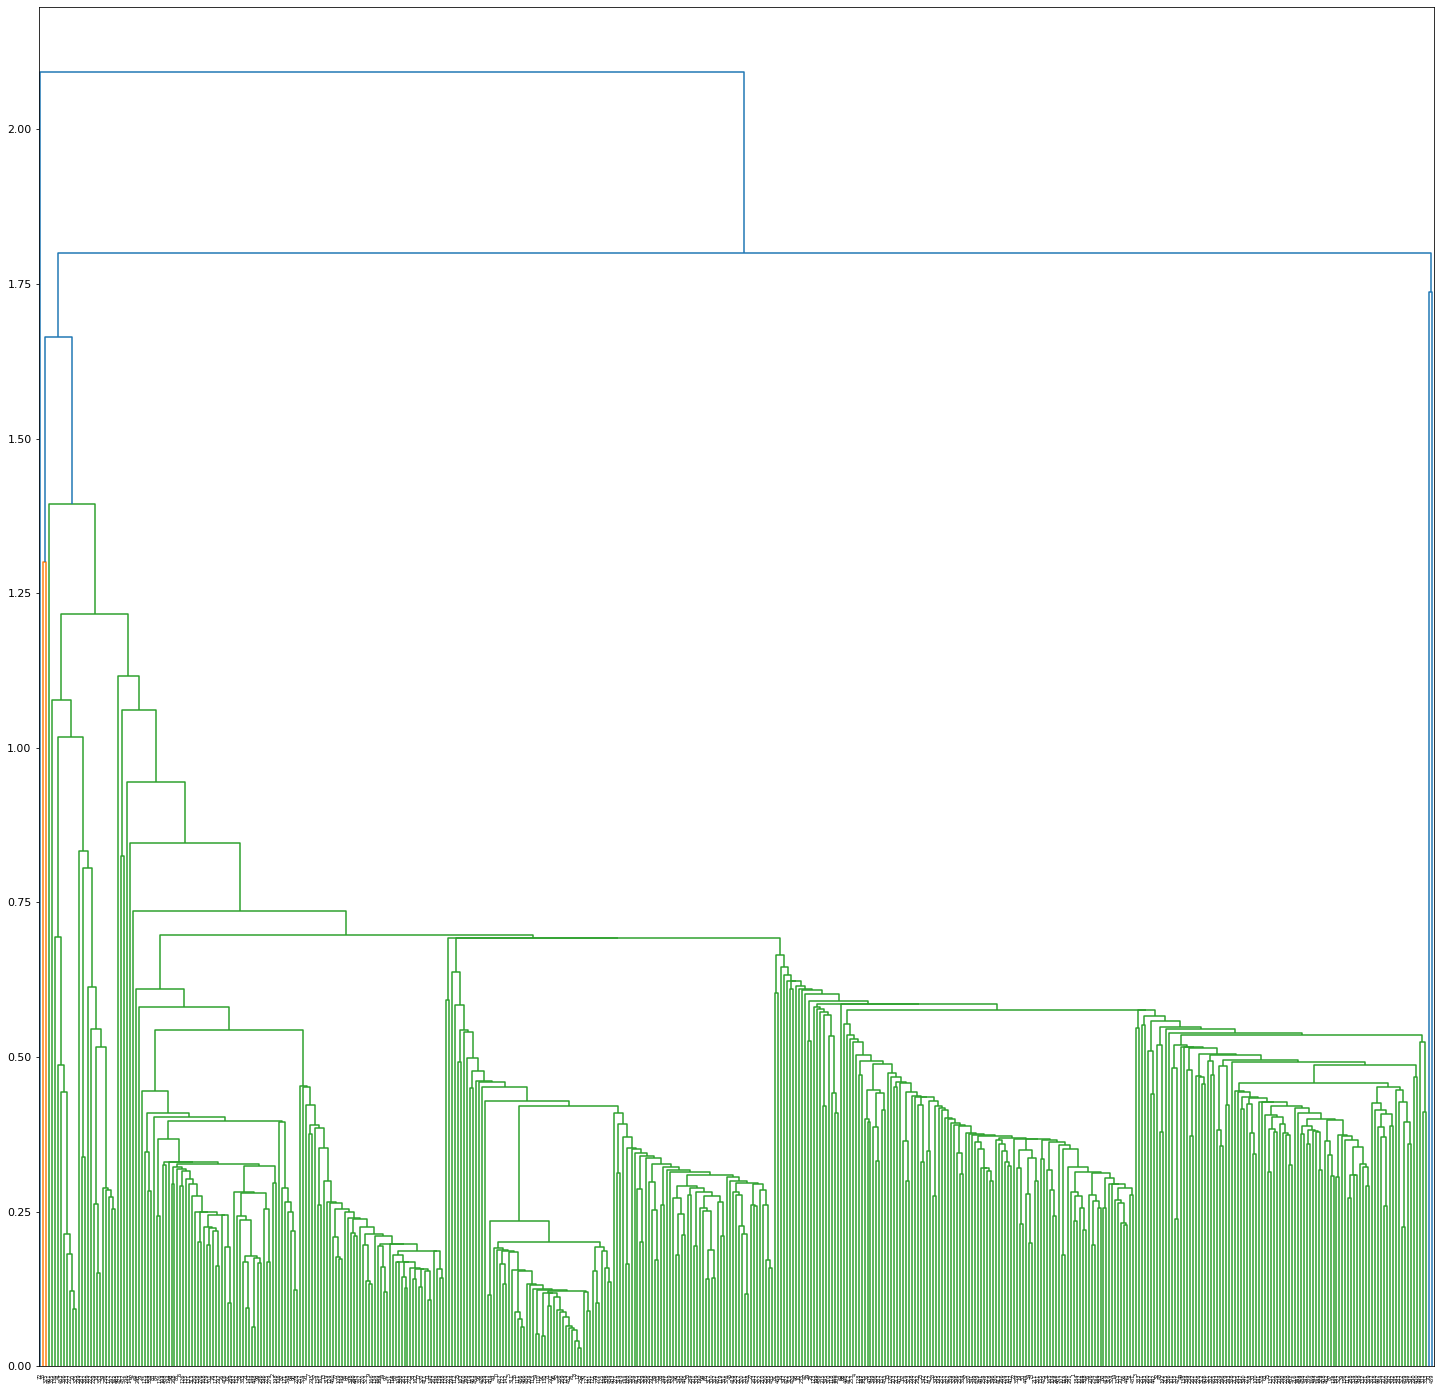

In [441]:
fi(25, 25)
_  = dendrogram(Zd) 
